In [2]:
#Imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math 
pd.set_option('display.max_columns', 300)
plt.style.use('ggplot')

In [3]:
#Reading application data
df1 = pd.read_csv("application_data.csv")
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
df1.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [5]:
null_col = df1.isnull().sum().sort_values(ascending = False)
null_col = null_col[null_col.values >(0.35*len(df1))]

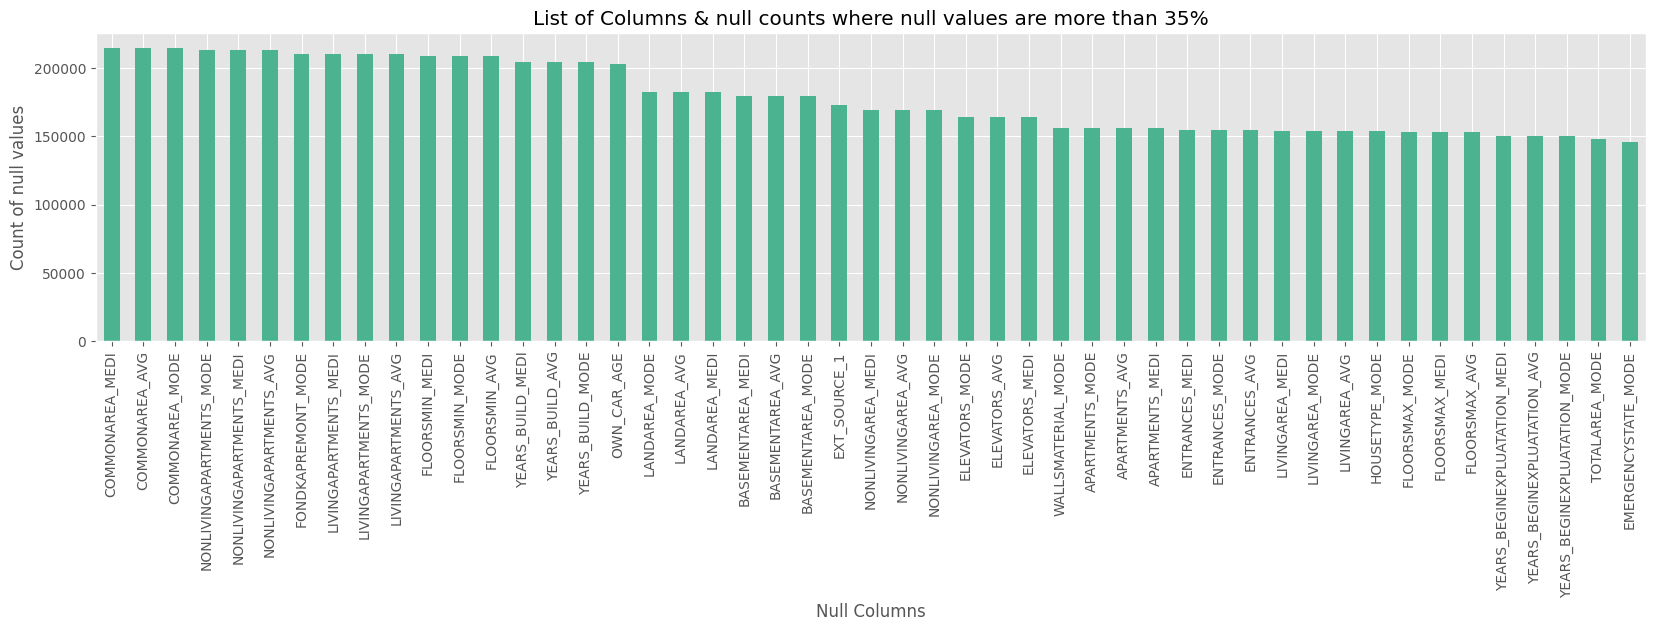

In [6]:
plt.figure(figsize=(20,4))
null_col.plot(kind='bar', color="#4CB391")                           
plt.title('List of Columns & null counts where null values are more than 35%') 

plt.xlabel("Null Columns",fontdict={"fontsize":12,"fontweight":5})                  #Setting X-label and Y-label
plt.ylabel("Count of null values",fontdict={"fontsize":12,"fontweight":5})
plt.show()

In [7]:
#Total columns which contains null value more than 35%

len(null_col)

49

In [8]:
#Total number columns present in the data set

df1.shape

(307511, 122)

In [9]:
#Droping these columns from the data set

label = list(null_col.index.values)
df1.drop(labels = label,axis=1,inplace = True)

In [10]:
#After removal of columns total number of columns remaining
df1.shape

(307511, 73)

In [11]:
#check the percentage of null values for each column again.

null = (df1.isnull().sum()/len(df1)*100).sort_values(ascending = False).head(50)
null.head(30)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
NAME_INCOME_TYPE               0.000000
FLAG_OWN_REALTY                0.000000
TARGET                         0.000000
FLAG_EMAIL                     0.000000
FLAG_PHONE                     0.000000
FLAG_CONT_MOBILE               0.000000
NAME_CONTRACT_TYPE             0.000000


In [12]:
#Handling the null values by placing mode 
df1.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df1.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_YEAR
df1.AMT_REQ_CREDIT_BUREAU_MON.fillna(df1.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_MON  
df1.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(df1.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_WEEK
df1.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df1.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_DAY
df1.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(df1.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_HOUR
df1.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df1.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_QRT
df1.NAME_TYPE_SUITE.fillna(df1.NAME_TYPE_SUITE.mode()[0],inplace = True) #NAME_TYPE_SUITE
df1.OBS_30_CNT_SOCIAL_CIRCLE.fillna( df1.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_30_CNT_SOCIAL_CIRCLE
df1.DEF_30_CNT_SOCIAL_CIRCLE.fillna( df1.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_30_CNT_SOCIAL_CIRCLE
df1.OBS_60_CNT_SOCIAL_CIRCLE.fillna( df1.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_60_CNT_SOCIAL_CIRCLE
df1.DEF_60_CNT_SOCIAL_CIRCLE.fillna( df1.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_60_CNT_SOCIAL_CIRCLE
df1.CNT_FAM_MEMBERS.fillna(df1.CNT_FAM_MEMBERS.mode() , inplace = True) #CNT_FAM_MEMBERS
df1.DAYS_LAST_PHONE_CHANGE.fillna(df1.DAYS_LAST_PHONE_CHANGE.mode()[0],inplace = True) #DAYS_LAST_PHONE_CHANGE
df1.EXT_SOURCE_2.fillna(df1.EXT_SOURCE_2.median() , inplace = True) #EXT_SOURCE_2
df1.EXT_SOURCE_3.fillna(df1.EXT_SOURCE_3.median() , inplace = True) #EXT_SOURCE_3

In [13]:
(df1.isnull().sum()/len(df1)*100).sort_values(ascending=False)


OCCUPATION_TYPE               31.345545
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
AMT_REQ_CREDIT_BUREAU_YEAR     0.000000
                                ...    
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_6                0.000000
SK_ID_CURR                     0.000000
Length: 73, dtype: float64

In [14]:
day_cols = [i for i in df1 if i.startswith('DAYS')]
day_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [15]:
df1[day_cols]= abs(df1[day_cols])


In [16]:
#Replaced Y,N flags with 1,0

df1['FLAG_OWN_CAR'] = np.where(df1['FLAG_OWN_CAR']=='Y', 1 , 0)  
df1['FLAG_OWN_REALTY'] = np.where(df1['FLAG_OWN_REALTY']=='Y', 1 , 0)


In [17]:
#Gender wise count
df1.CODE_GENDER.value_counts()


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [18]:
#Replacing the XNA with F because as we have more female count
df1.loc[df1.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F' 


In [19]:
#After replacing XNA with F
df1.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [20]:
#Categories in organization type
df1.ORGANIZATION_TYPE.value_counts().head()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Name: ORGANIZATION_TYPE, dtype: int64

In [21]:
#Categories in Income type column
df1.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [22]:
df1['ORGANIZATION_TYPE'] = df1['ORGANIZATION_TYPE'].replace('XNA', 'Pensioner')
df1['OCCUPATION_TYPE'].fillna('Pensioner' , inplace = True)

In [23]:
df1['AMT_INCOME_TYPE'] = pd.qcut(df1.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
df1['AMT_INCOME_TYPE'].head(11)


0        MEDIUM
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5      VERY_LOW
6        MEDIUM
7     VERY_HIGH
8           LOW
9           LOW
10          LOW
Name: AMT_INCOME_TYPE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [24]:
df1['DAYS_BIRTH']= (df1['DAYS_BIRTH']/365).astype(int)    # Converting 
df1['DAYS_BIRTH'].unique()
df1['AGE_GROUP']=pd.cut(df1['DAYS_BIRTH'],                 
                         bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  int32   
 5   FLAG_OWN_REALTY              307511 non-null  int32   
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [26]:
df1['NAME_CONTRACT_TYPE'] = df1['NAME_CONTRACT_TYPE'].astype('category')
df1['CODE_GENDER'] = df1['CODE_GENDER'].astype('category')
df1['NAME_TYPE_SUITE'] = df1['NAME_TYPE_SUITE'].astype('category')
df1['NAME_INCOME_TYPE'] = df1['NAME_INCOME_TYPE'].astype('category')
df1['NAME_EDUCATION_TYPE'] = df1['NAME_EDUCATION_TYPE'].astype('category')
df1['NAME_FAMILY_STATUS'] = df1['NAME_FAMILY_STATUS'].astype('category')
df1['NAME_HOUSING_TYPE'] = df1['NAME_HOUSING_TYPE'].astype('category')
df1['OCCUPATION_TYPE'] = df1['OCCUPATION_TYPE'].astype('category')
df1['WEEKDAY_APPR_PROCESS_START'] = df1['WEEKDAY_APPR_PROCESS_START'].astype('category')
df1['ORGANIZATION_TYPE'] = df1['ORGANIZATION_TYPE'].astype('category')

In [27]:
#Removal of unwanted columns

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df1.drop(labels=unwanted,axis=1,inplace=True)

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  int32   
 5   FLAG_OWN_REALTY              307511 non-null  int32   
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [29]:
#Final columns count
df1.shape

(307511, 47)

In [30]:
numerical_col = df1.select_dtypes(include='number').columns
len(numerical_col)

35

In [31]:
numerical_col

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

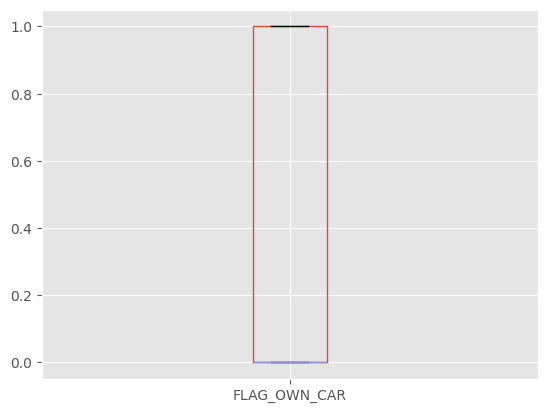

In [32]:
df1.boxplot(column='FLAG_OWN_CAR', return_type='axes');

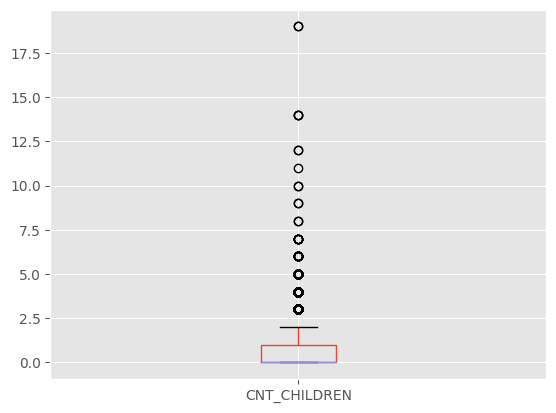

In [33]:
df1.boxplot(column='CNT_CHILDREN', return_type='axes');

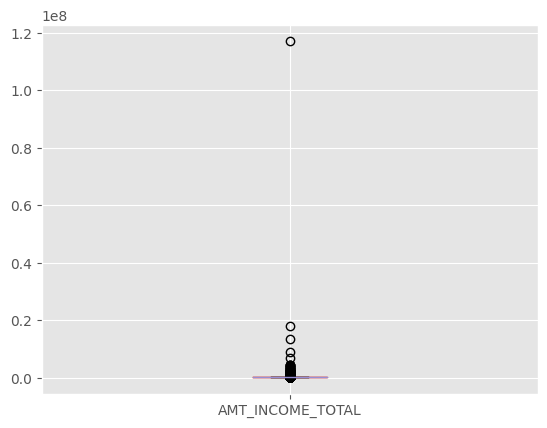

In [34]:
df1.boxplot(column='AMT_INCOME_TOTAL', return_type='axes');

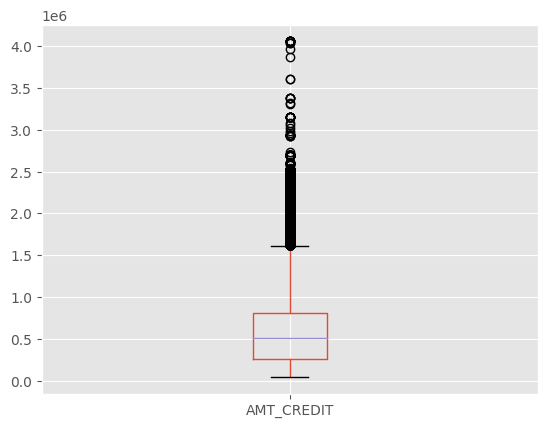

In [35]:
df1.boxplot(column='AMT_CREDIT', return_type='axes');

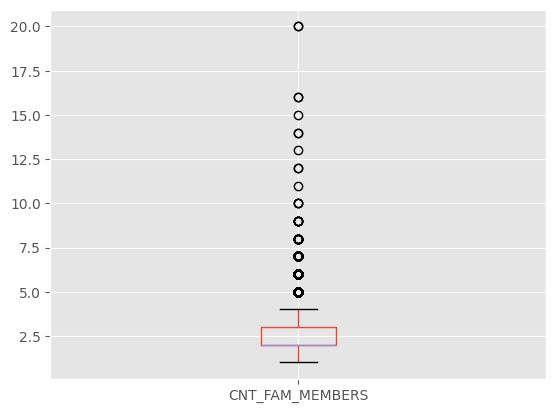

In [36]:
df1.boxplot(column='CNT_FAM_MEMBERS', return_type='axes');

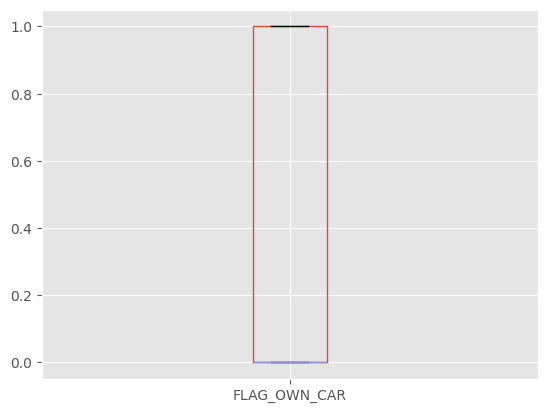

In [37]:
df1.boxplot(column='FLAG_OWN_CAR', return_type='axes');

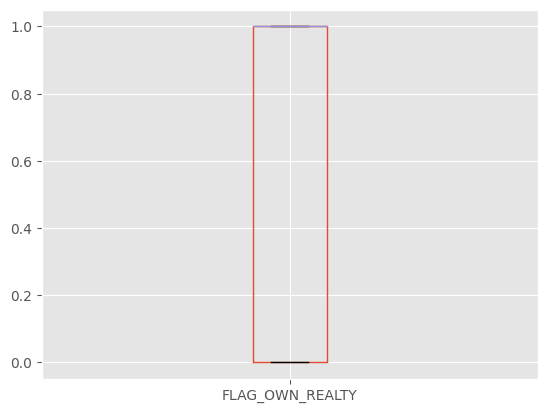

In [38]:
df1.boxplot(column='FLAG_OWN_REALTY', return_type='axes');

C:\Users\GIGA\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  


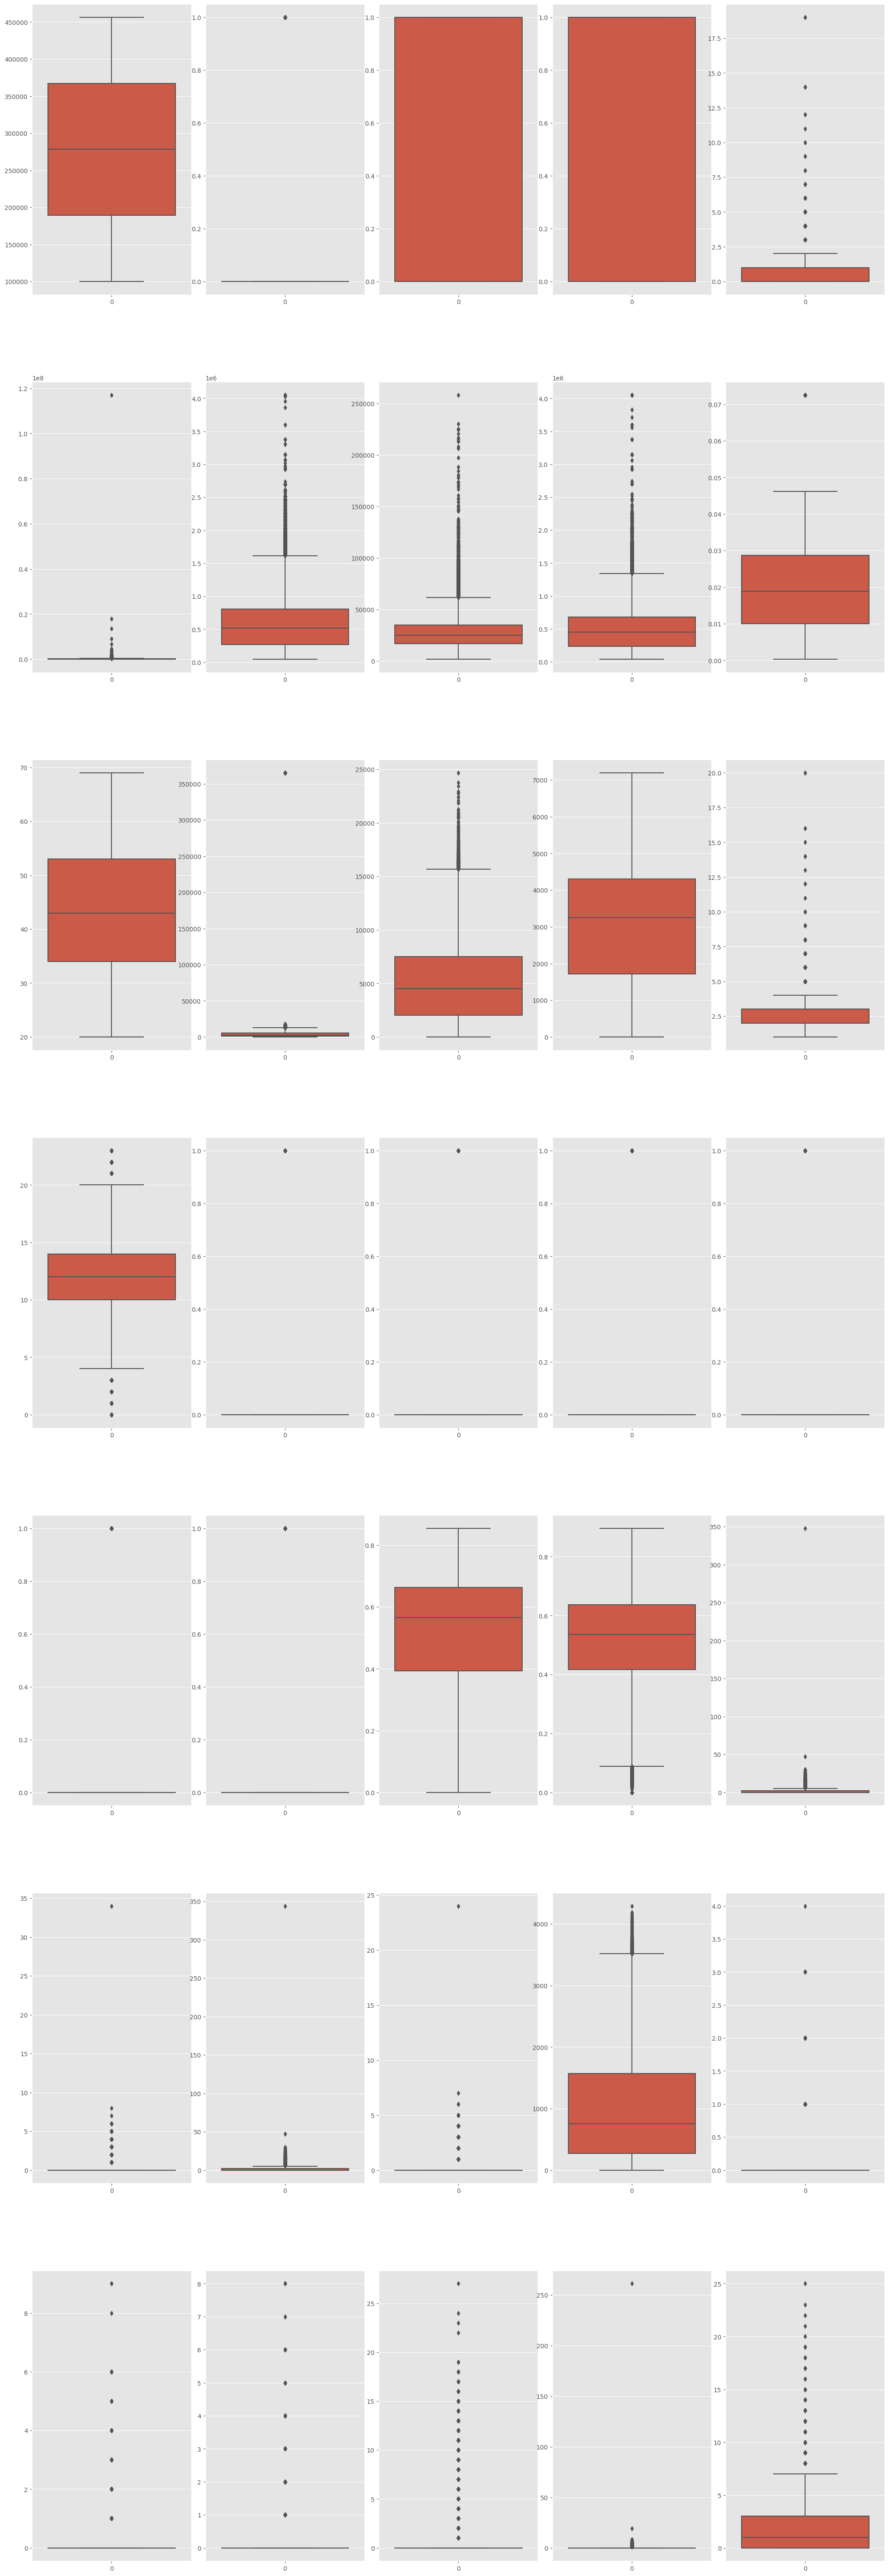

In [39]:
fig , axes = plt.subplots(nrows=7, ncols=5, constrained_layout=True)                 # Plot Configuration 
fig.subplots_adjust(left= 0, bottom=0, right=3, top=12, wspace=0.09, hspace=0.3)


for ax, column in zip(axes.flatten(),numerical_col):        #Using For loop 

    sns.boxplot(df1[column],ax=ax)   #Ploting

In [40]:
#Group by the defaulters and non defulaters
#Non-Defaulters
Target0 = df1.loc[df1["TARGET"]==0]

#Defaulters
Target1 = df1.loc[df1["TARGET"]==1]

Defaulters :  8.072881945686495
Non-Defaulters :  91.92711805431351


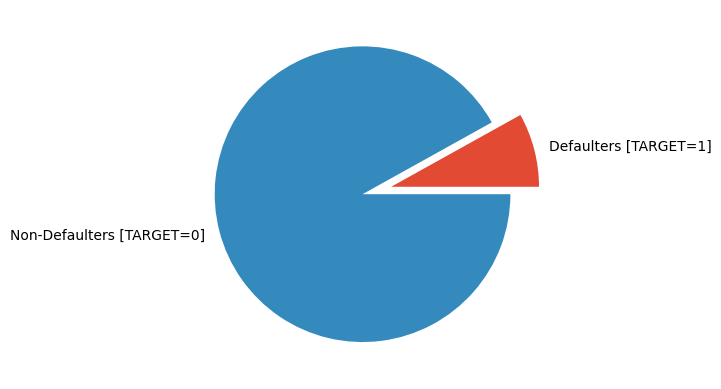

In [41]:
count1 = 0 
count0 = 0
for i in df1['TARGET'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1
        
count1 = (count1/len(df1['TARGET']))*100
count0 = (count0/len(df1['TARGET']))*100

print('Defaulters : ',count1)
print('Non-Defaulters : ',count0)

y = [count1, count0]

mylabels = ["Defaulters [TARGET=1]", "Non-Defaulters [TARGET=0]"]
myexplode = [0.2, 0,]

plt.pie(y, labels = mylabels, explode = myexplode)
plt.show() 

#Reference - https://www.w3schools.com/python/matplotlib_pie_charts.asp

In [42]:
#Ratio Between Defaulters and non-defaulters
len(Target0)/len(Target1)

11.387150050352467

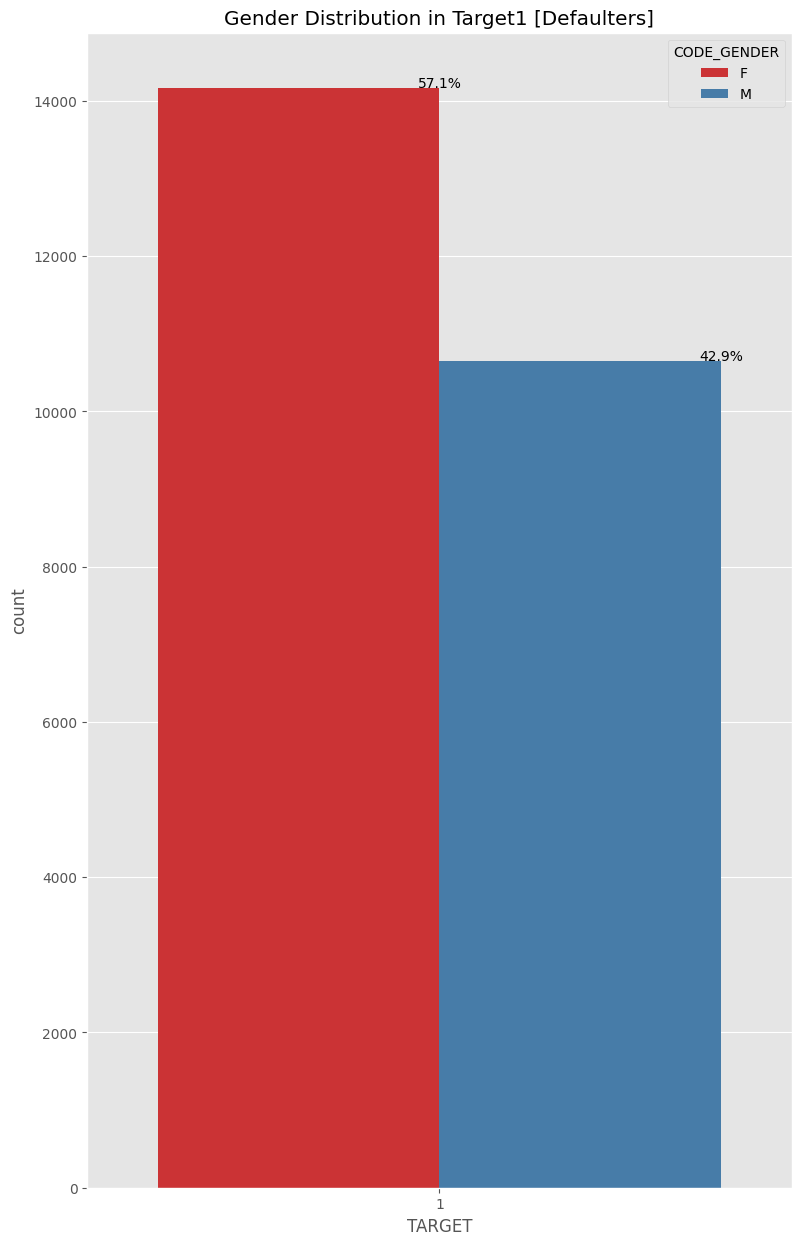

In [43]:
#Here the graph will be in 15 x 8 inches
plt.figure(figsize=(20,15))
#121 => 1 column, 2 rows and plot number
plt.subplot(121)
#x variable in data, hue takes column name, data is data frame for which we are plotting 
ax = sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target1, palette = 'Set1')
plt.title("Gender Distribution in Target1 [Defaulters]")

#Calculating the percetage on the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(Target1))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

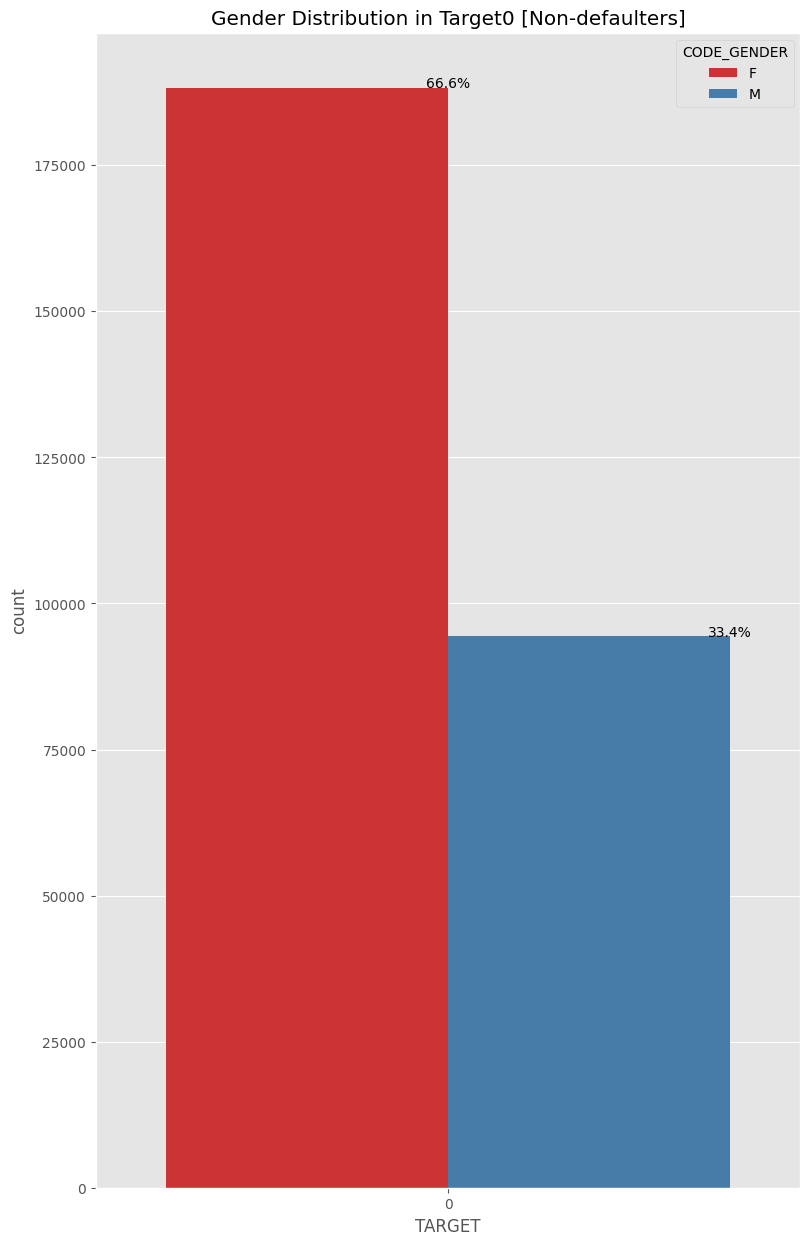

In [44]:
#Here the graph will be in 15 x 8 inches
plt.figure(figsize=(20,15))
#121 => 1 column, 2 rows and plot number
plt.subplot(121)
#x variable in data, hue takes column name, data is data frame for which we are plotting 
ax = sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target0, palette = 'Set1')
plt.title("Gender Distribution in Target0 [Non-defaulters]")

#Calculating the percetage on the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(Target0))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

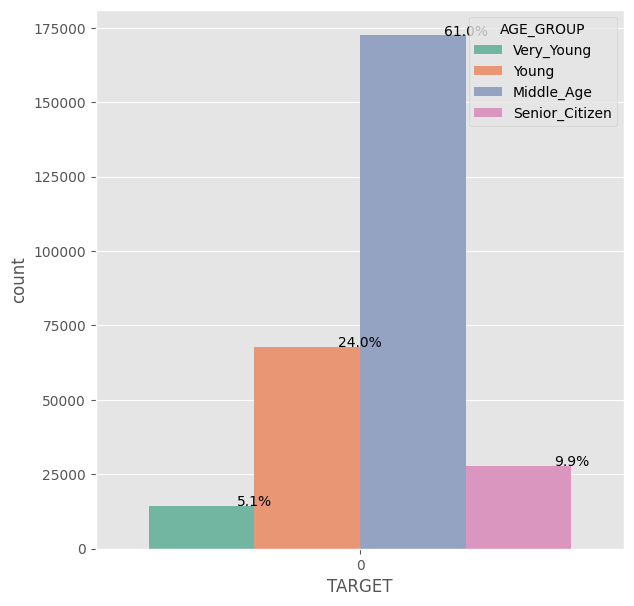

In [45]:
plt.figure(figsize=(15,7)) 
plt.subplot(121)
ax=sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target0,palette='Set2')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(Target0))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')


plt.show()

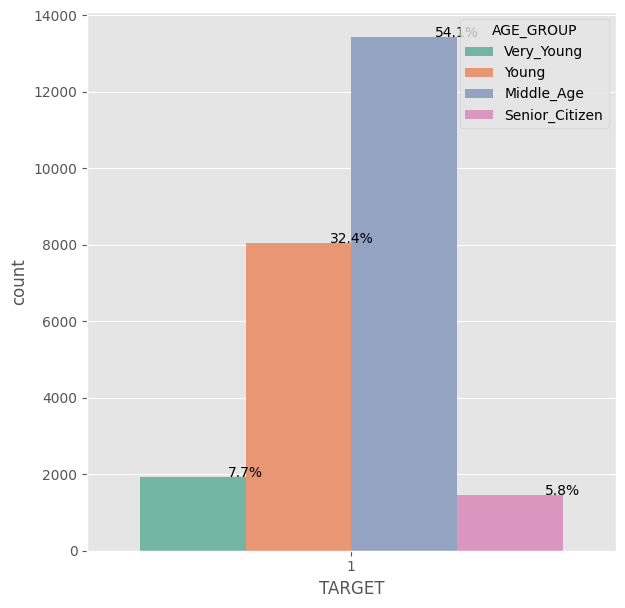

In [46]:
plt.figure(figsize=(15,7)) 
plt.subplot(121)
ax=sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target1,palette='Set2')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(Target1))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')


plt.show()

<Figure size 4000x500 with 0 Axes>

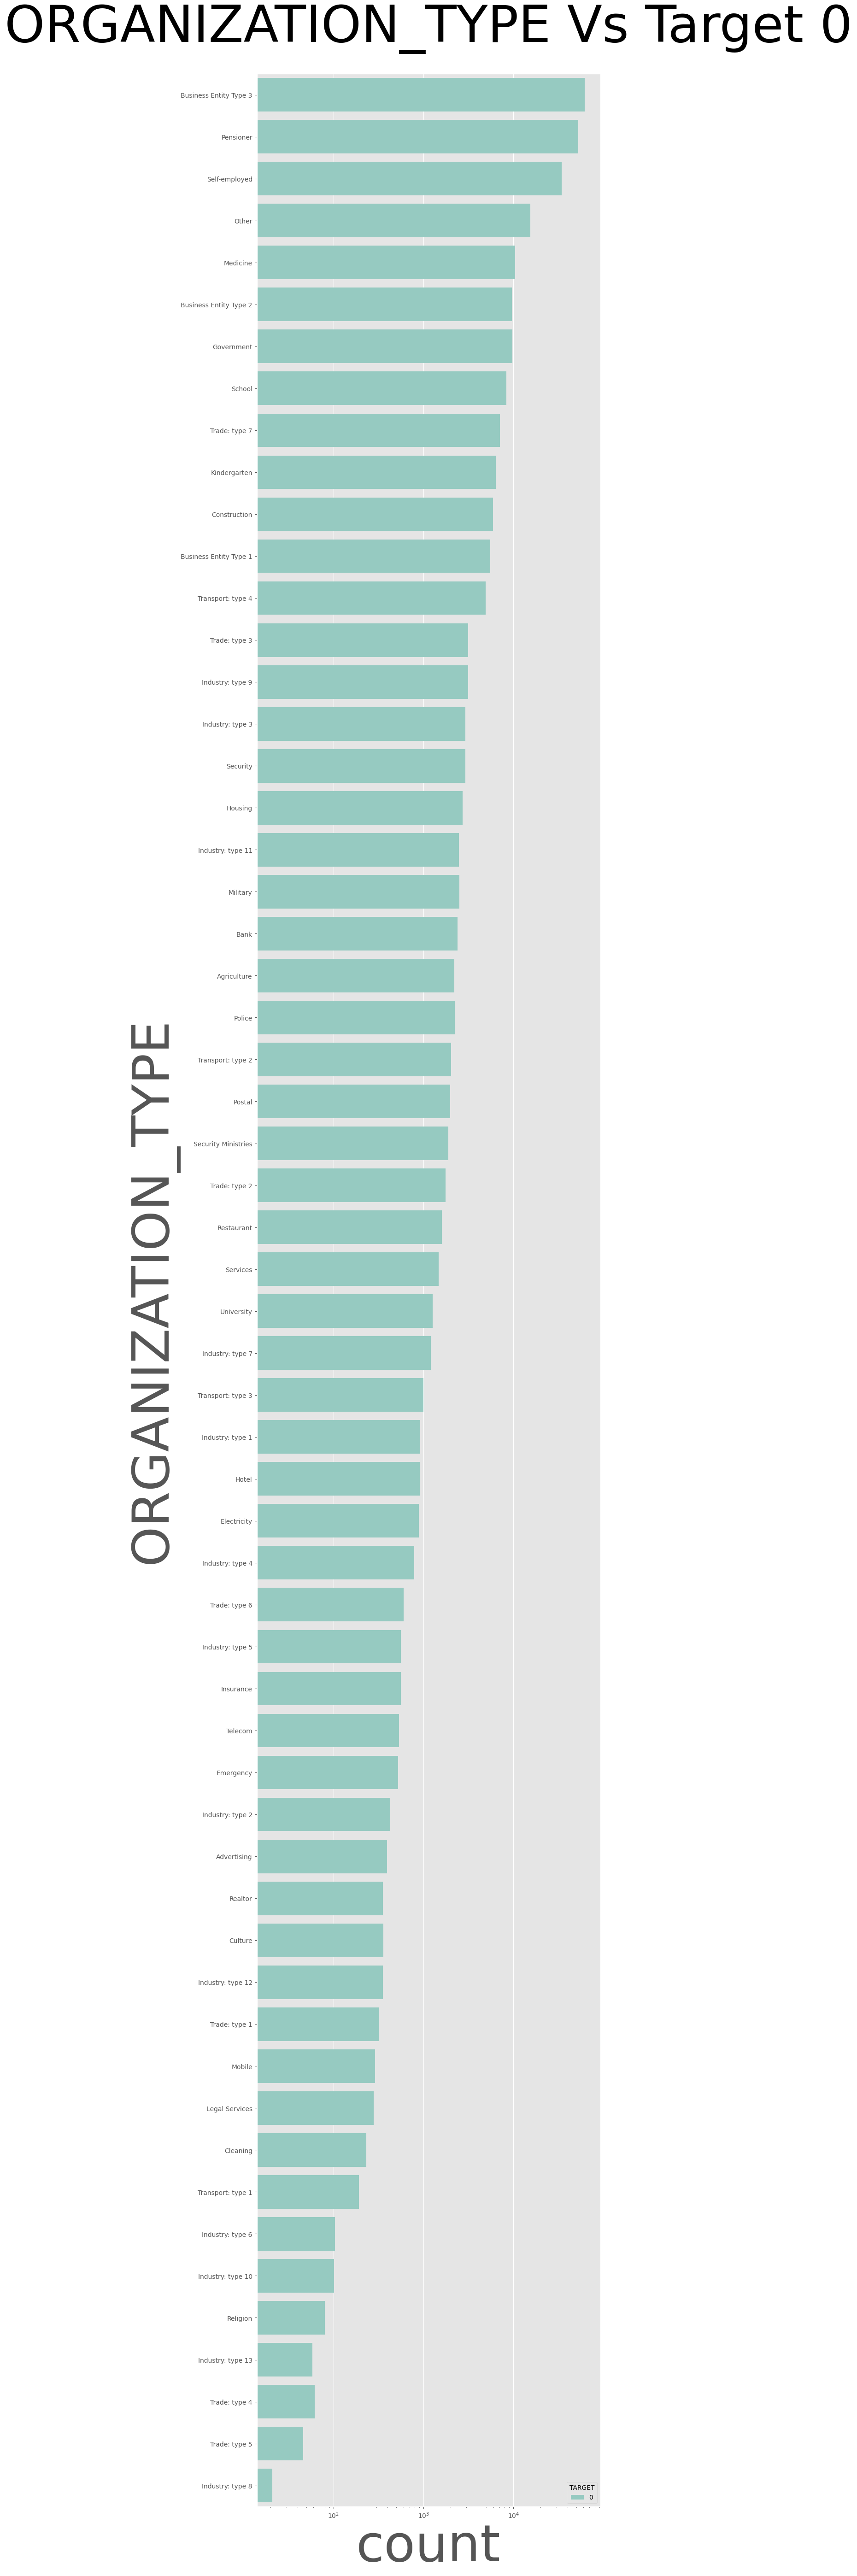

In [47]:
plt.figure(figsize=(40,5))
plt.rcParams["axes.labelsize"] = 80
plt.rcParams['axes.titlesize'] = 80                                                           # Plot Configuration 
plt.rcParams['axes.titlepad'] = 50
fig, axes = plt.subplots(nrows=1,ncols=1)                  
fig.subplots_adjust(left= 0.09,bottom=1,right=3,top= 12,wspace=0.5,hspace=0.3) 


plt.subplot(121)
plt.xscale('log')                                                                             # For Target0      
ax = sns.countplot(data=Target0,y='ORGANIZATION_TYPE',
              order=df1['ORGANIZATION_TYPE'].value_counts().index,palette='Set3',hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target 0")

plt.show();

<Figure size 4000x500 with 0 Axes>

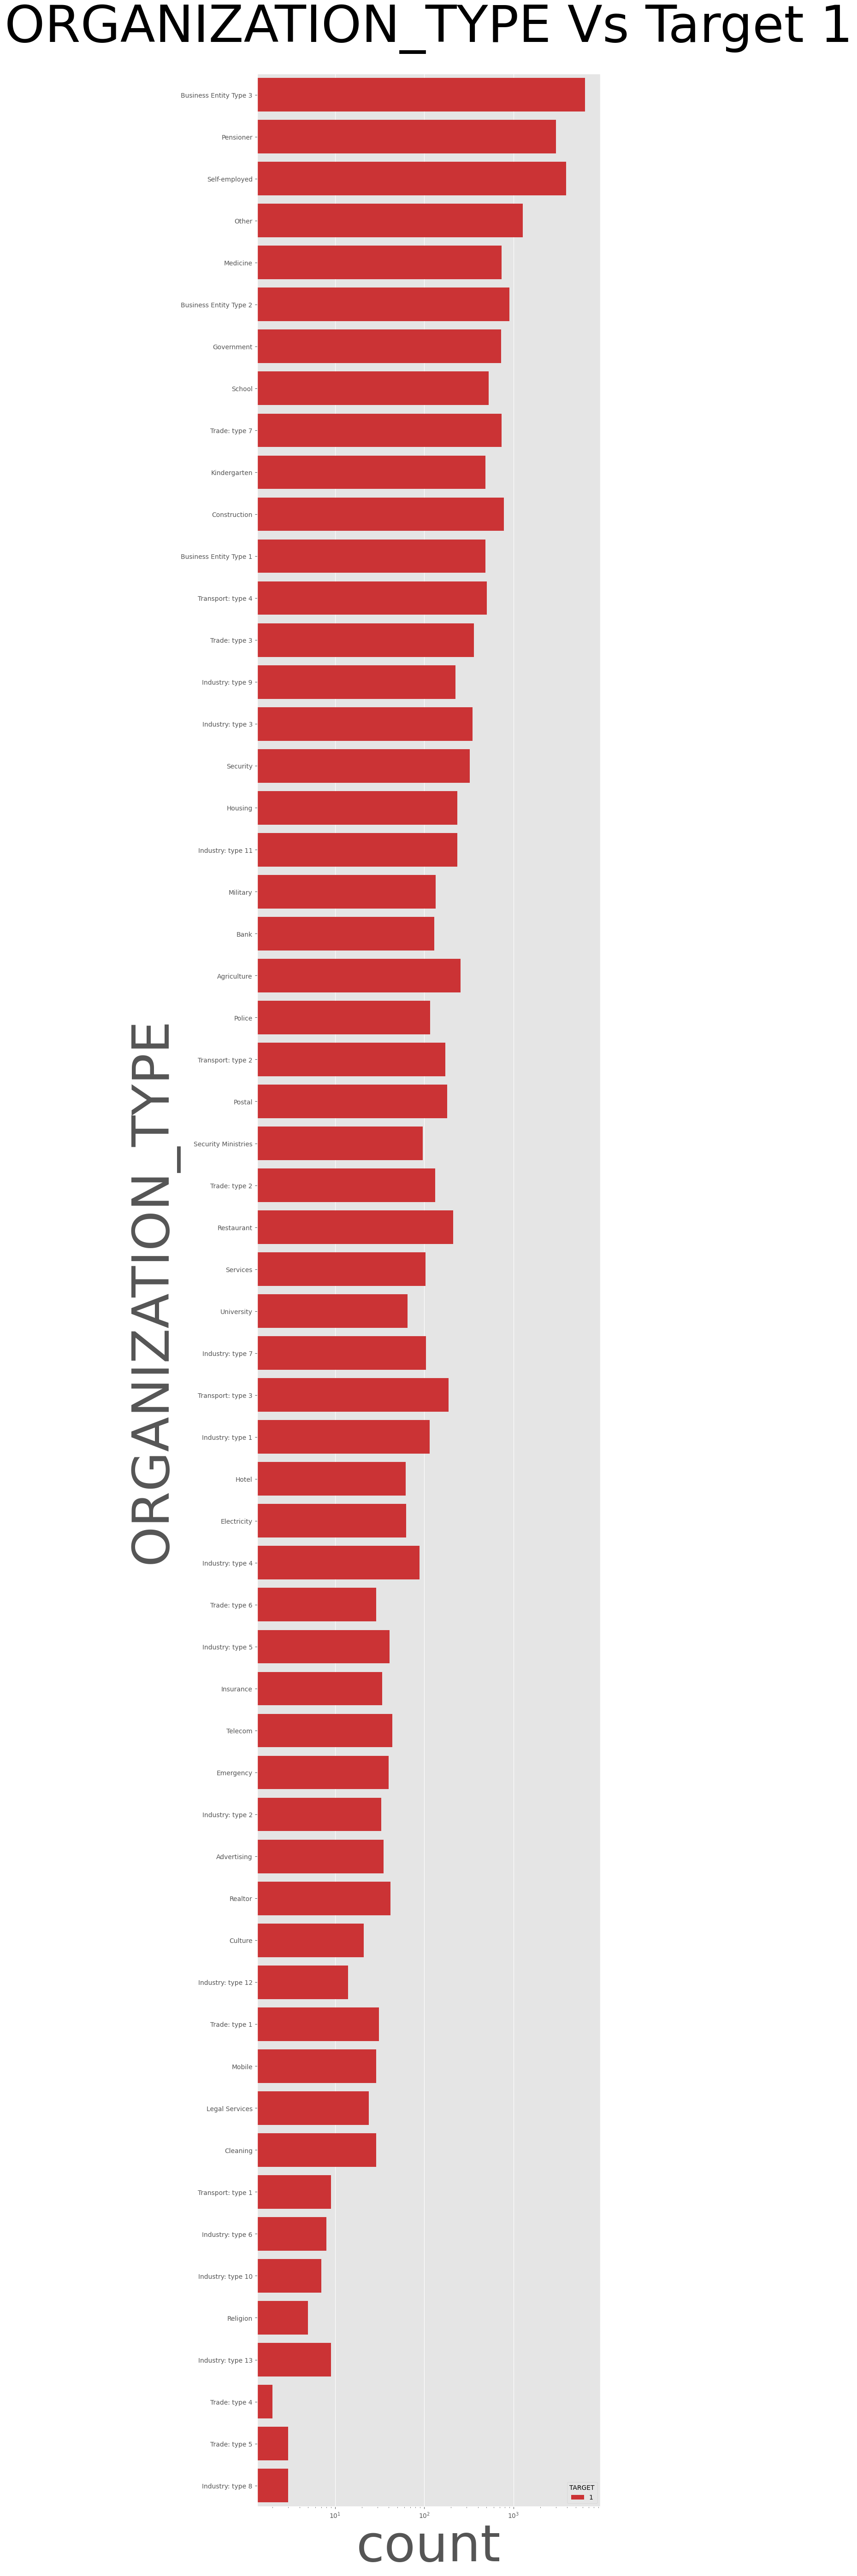

In [48]:
plt.figure(figsize=(40,5))
plt.rcParams["axes.labelsize"] = 80
plt.rcParams['axes.titlesize'] = 80                                                           # Plot Configuration 
plt.rcParams['axes.titlepad'] = 50
fig, axes = plt.subplots(nrows=1,ncols=1)                  
fig.subplots_adjust(left= 0.09,bottom=1,right=3,top= 12,wspace=0.5,hspace=0.3) 

plt.subplot(121)
plt.xscale('log')                                                                              # For Target1
ax1 = sns.countplot(data=Target1,y='ORGANIZATION_TYPE',
              order=df1['ORGANIZATION_TYPE'].value_counts().index,palette='Set1',hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target 1")

plt.show();

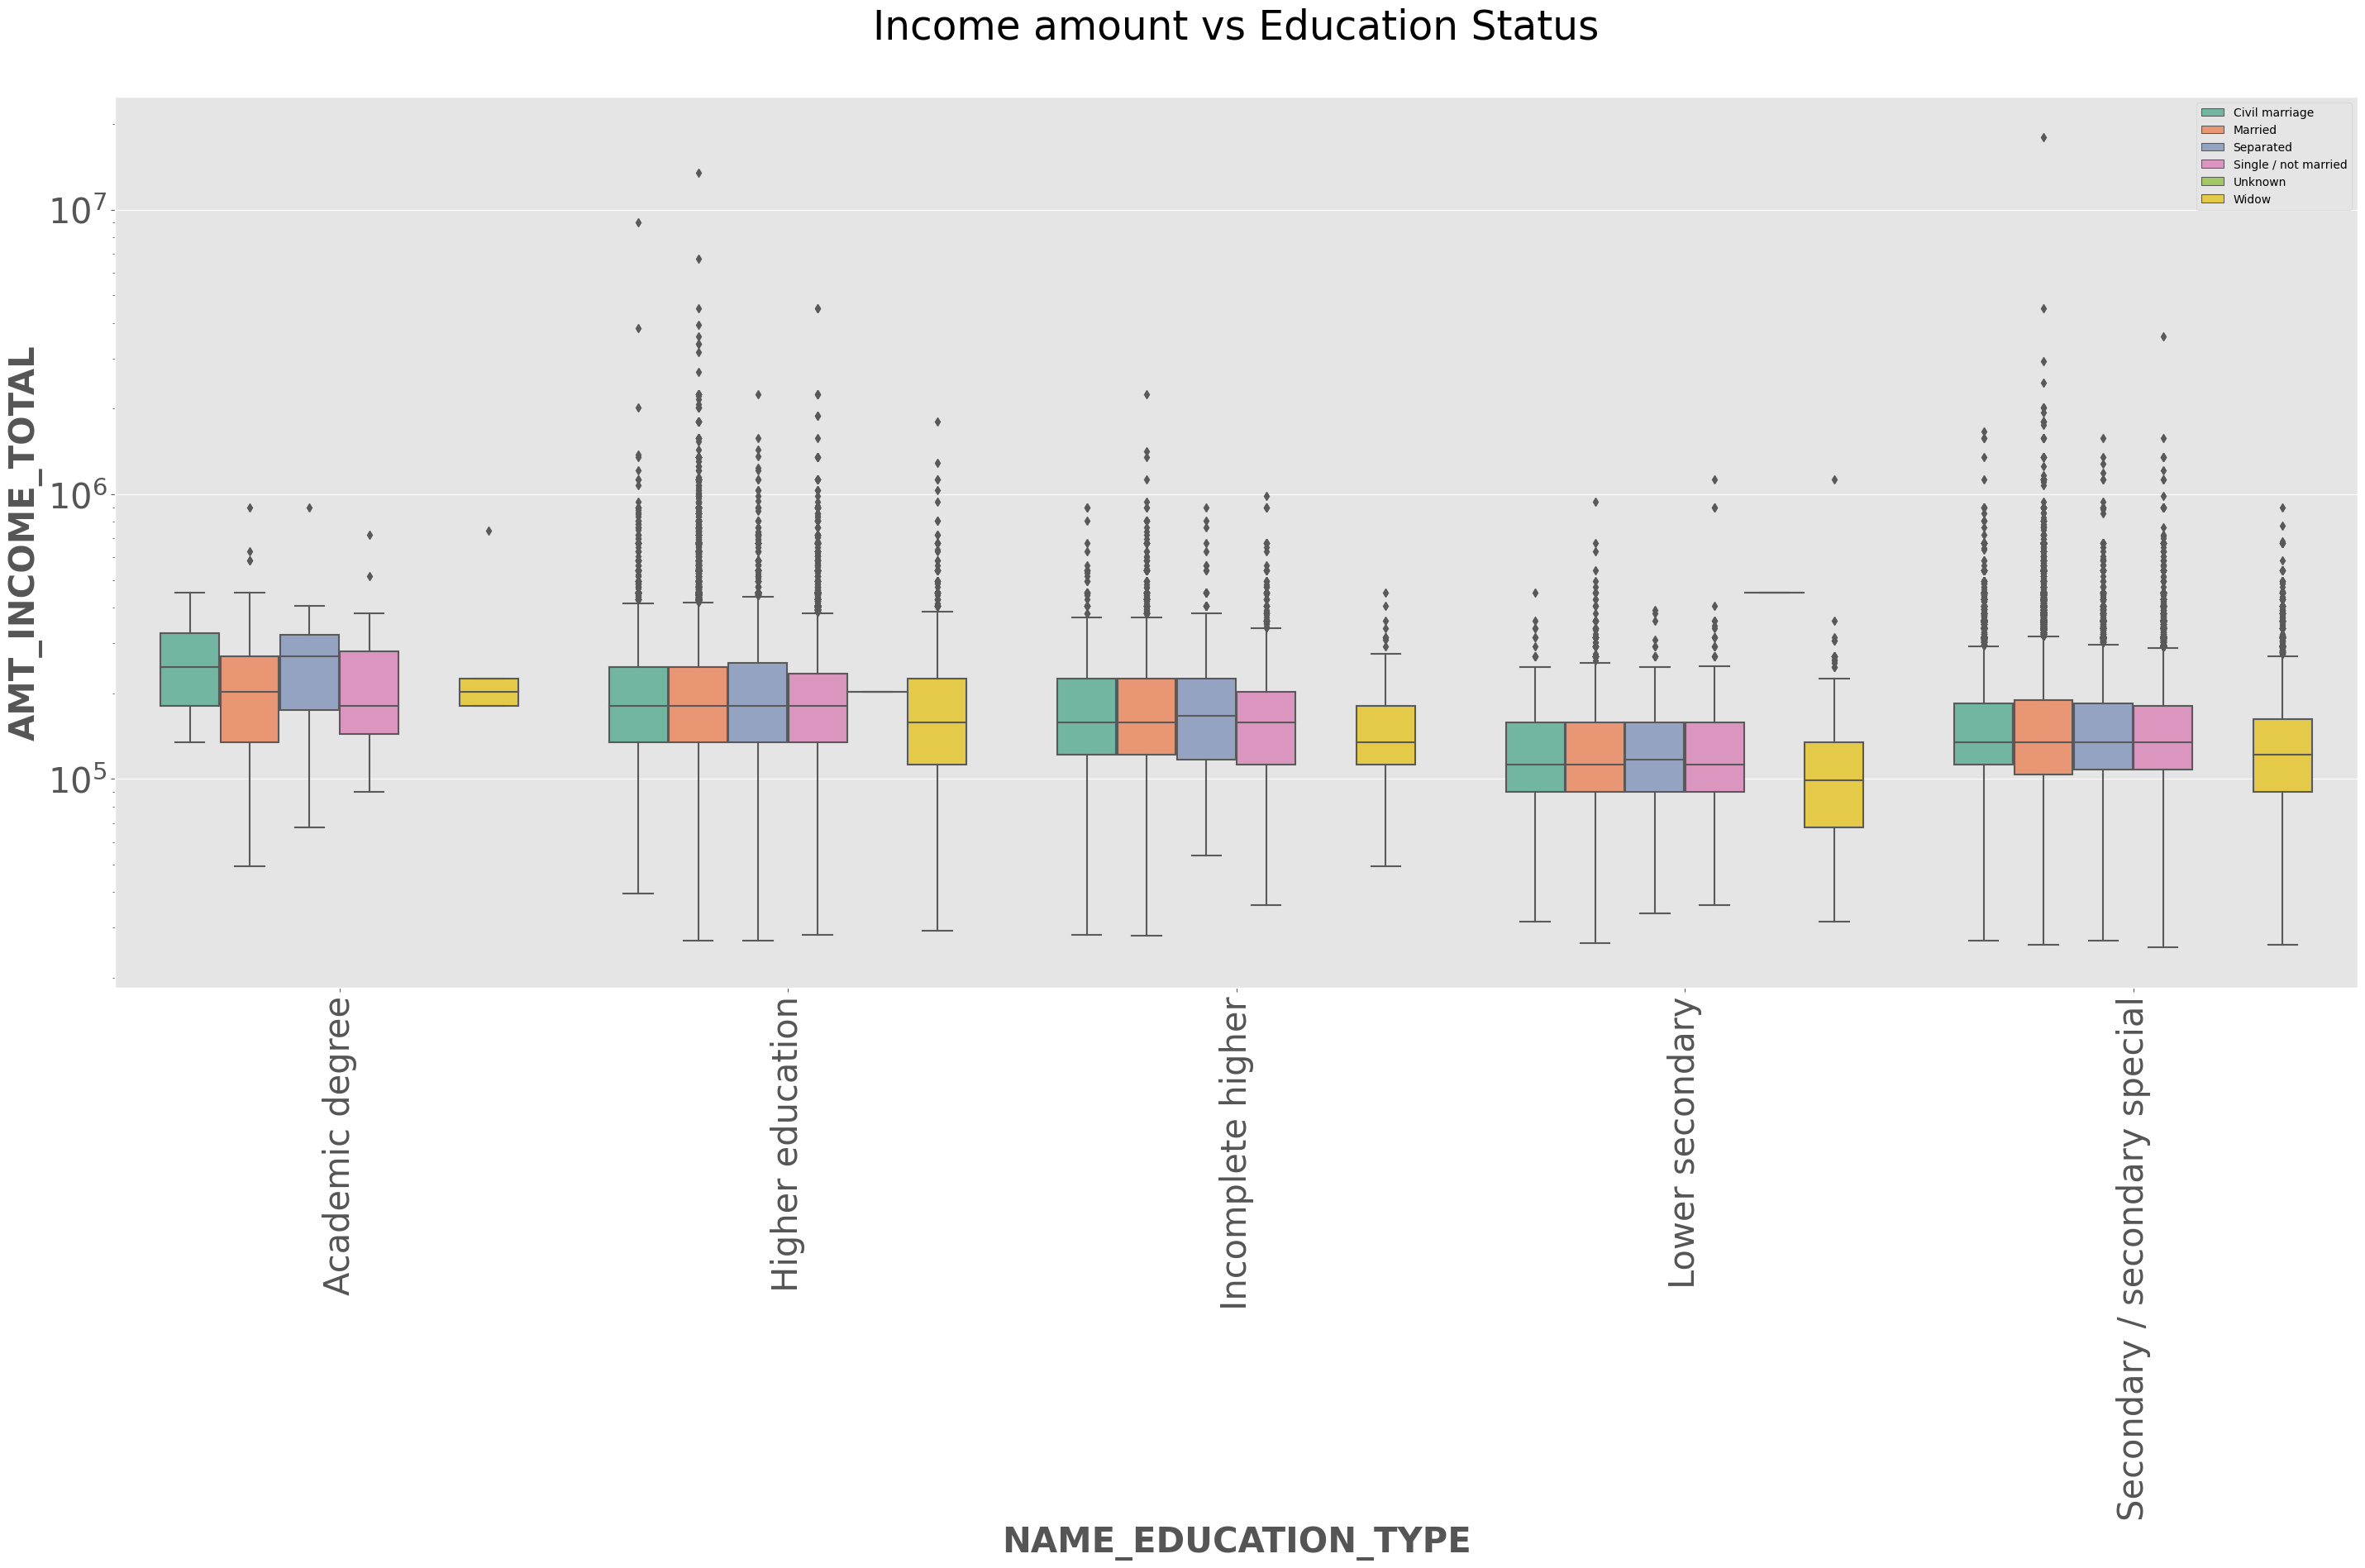

In [49]:
plt.figure(figsize=(35,14)) 
plt.yscale('log')                     #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =Target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',   #Boxplot w.r.t Data Target 0
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( loc = 'upper right')                                              #Adjusting legend position
plt.title('Income amount vs Education Status',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

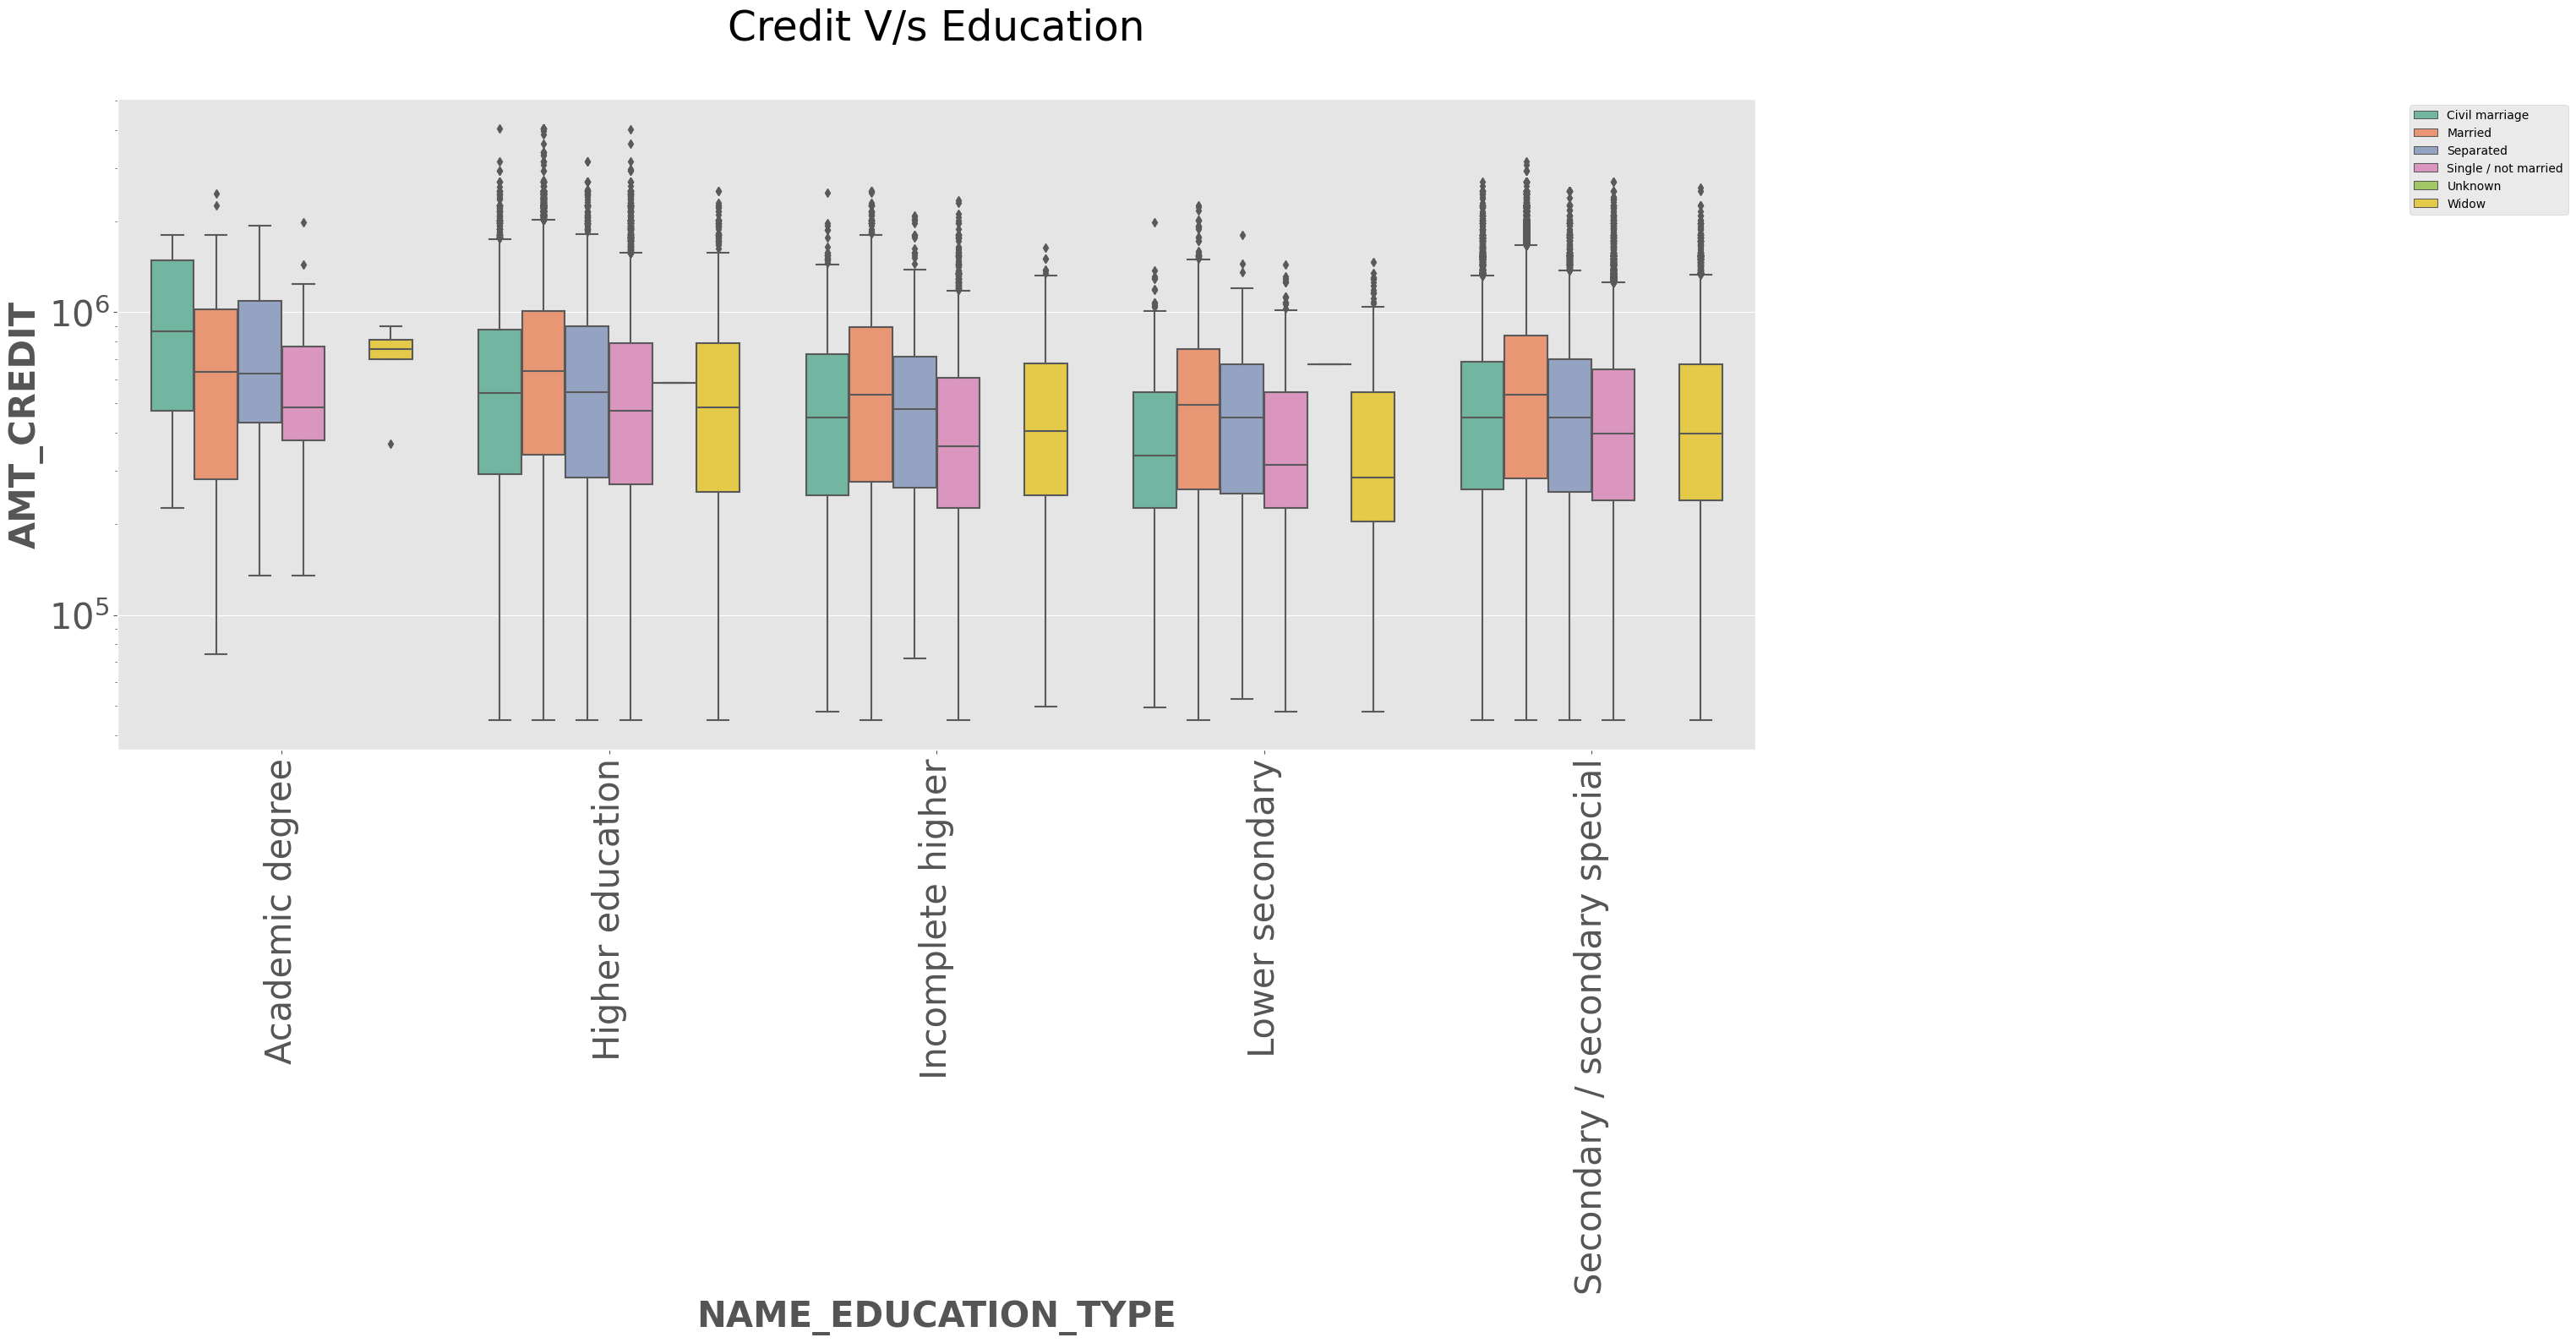

In [50]:
plt.figure(figsize=(25,10))
plt.yscale('log')                      #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =Target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',           #Boxplot w.r.t Data Target 0
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( bbox_to_anchor=(1.5, 1),loc = 'upper right')            #Adjusting legend position
plt.title('Credit V/s Education',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

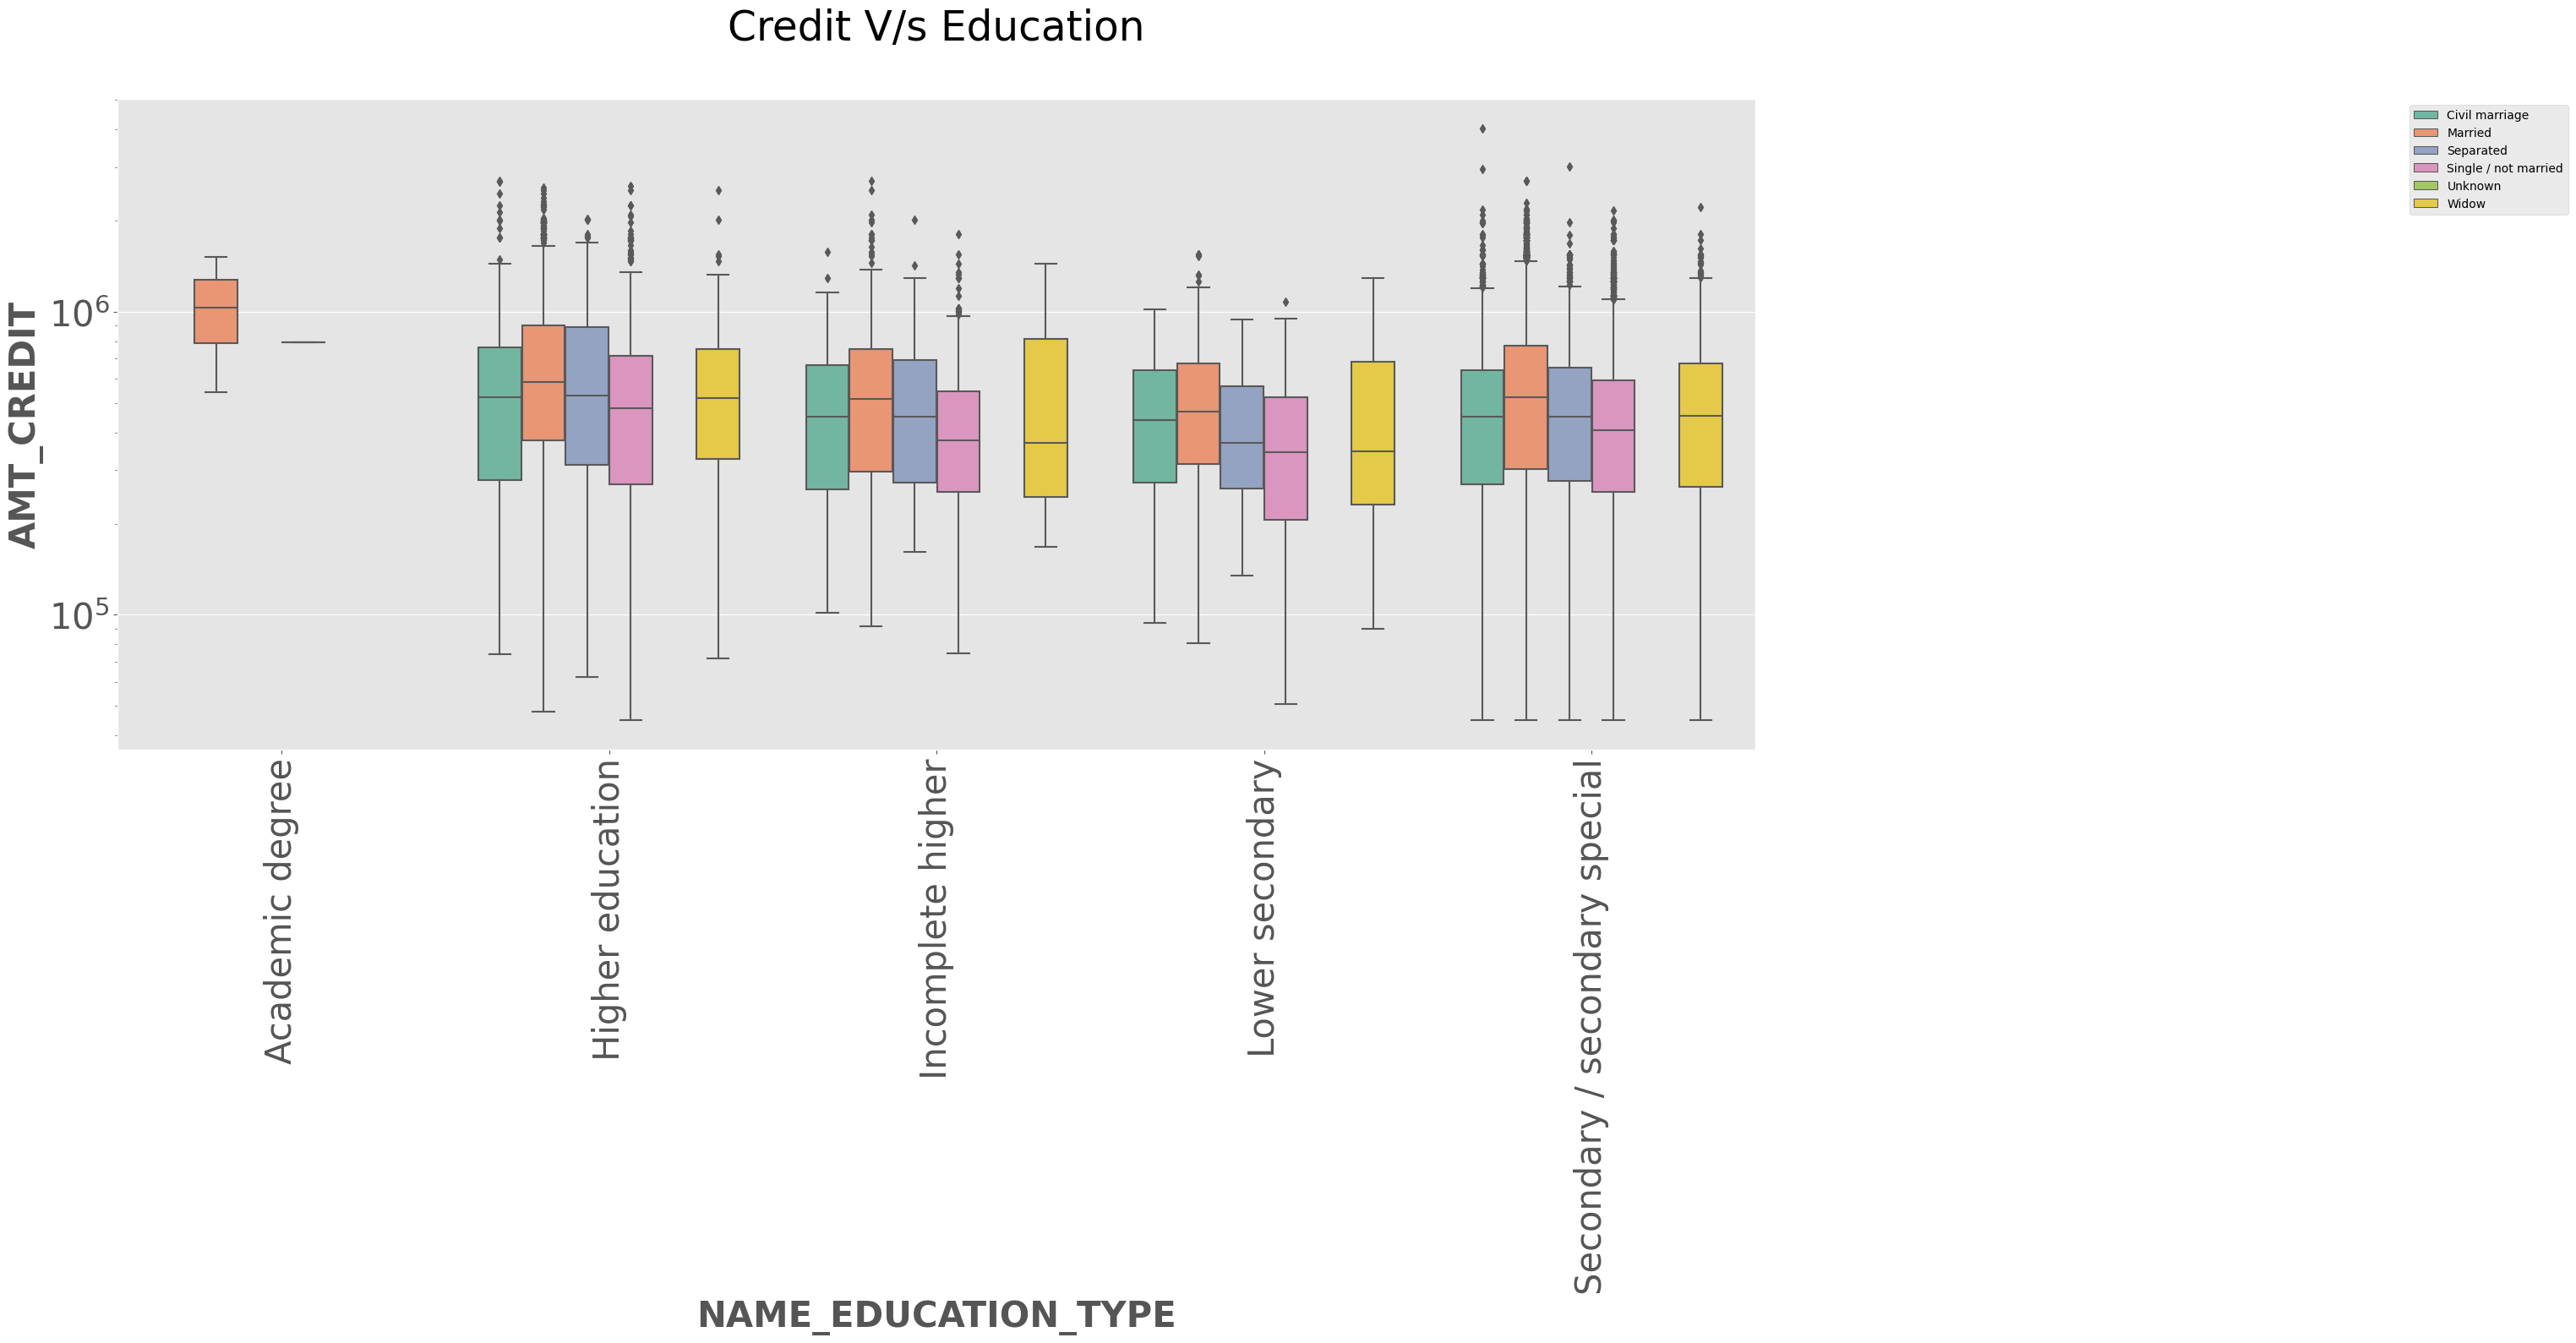

In [51]:
plt.figure(figsize=(25,10))
plt.yscale('log')                      #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =Target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',           #Boxplot w.r.t Data Target 0
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( bbox_to_anchor=(1.5, 1),loc = 'upper right')            #Adjusting legend position
plt.title('Credit V/s Education',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

In [52]:
table= pd.pivot_table(df1, values='TARGET', index=['CODE_GENDER','AMT_INCOME_TYPE'],
                      columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)

table

NAME_EDUCATION_TYPE          Academic degree  Higher education  \
CODE_GENDER AMT_INCOME_TYPE                                      
F           VERY_LOW                0.000000          0.056068   
            LOW                     0.000000          0.049022   
            MEDIUM                  0.000000          0.050254   
            HIGH                    0.105263          0.041516   
            VERY_HIGH               0.076923          0.037289   
M           VERY_LOW                0.000000          0.080411   
            LOW                     0.000000          0.073305   
            MEDIUM                  0.000000          0.070086   
            HIGH                    0.000000          0.055911   
            VERY_HIGH               0.000000          0.044080   

NAME_EDUCATION_TYPE          Incomplete higher  Lower secondary  \
CODE_GENDER AMT_INCOME_TYPE                                       
F           VERY_LOW                  0.086399         0.080193   
            LOW                       0.080075         0.113889   
            MEDIUM                    0.078431         0.096983   
            HIGH                      0.074313         0.038961   
            VERY_HIGH                 0.082251         0.066667   
M           VERY_LOW                  0.123967         0.125000   
            LOW                       0.097778         0.142857   
            MEDIUM                    0.095130         0.150515   
            HIGH                      0.074627         0.081633   
            VERY_HIGH                 0.077586         0.064516   

NAME_EDUCATION_TYPE          Secondary / secondary special  
CODE_GENDER AMT_INCOME_TYPE                                 
F           VERY_LOW                              0.076778  
            LOW                                   0.079523  
            MEDIUM                                0.075692  
            HIGH                                  0.070736  
            VERY_HIGH                             0.065930  
M           VERY_LOW                              0.118066  
            LOW                                   0.123693  
            MEDIUM                                0.113466  
            HIGH                                  0.093484  
            VERY_HIGH                             0.089939

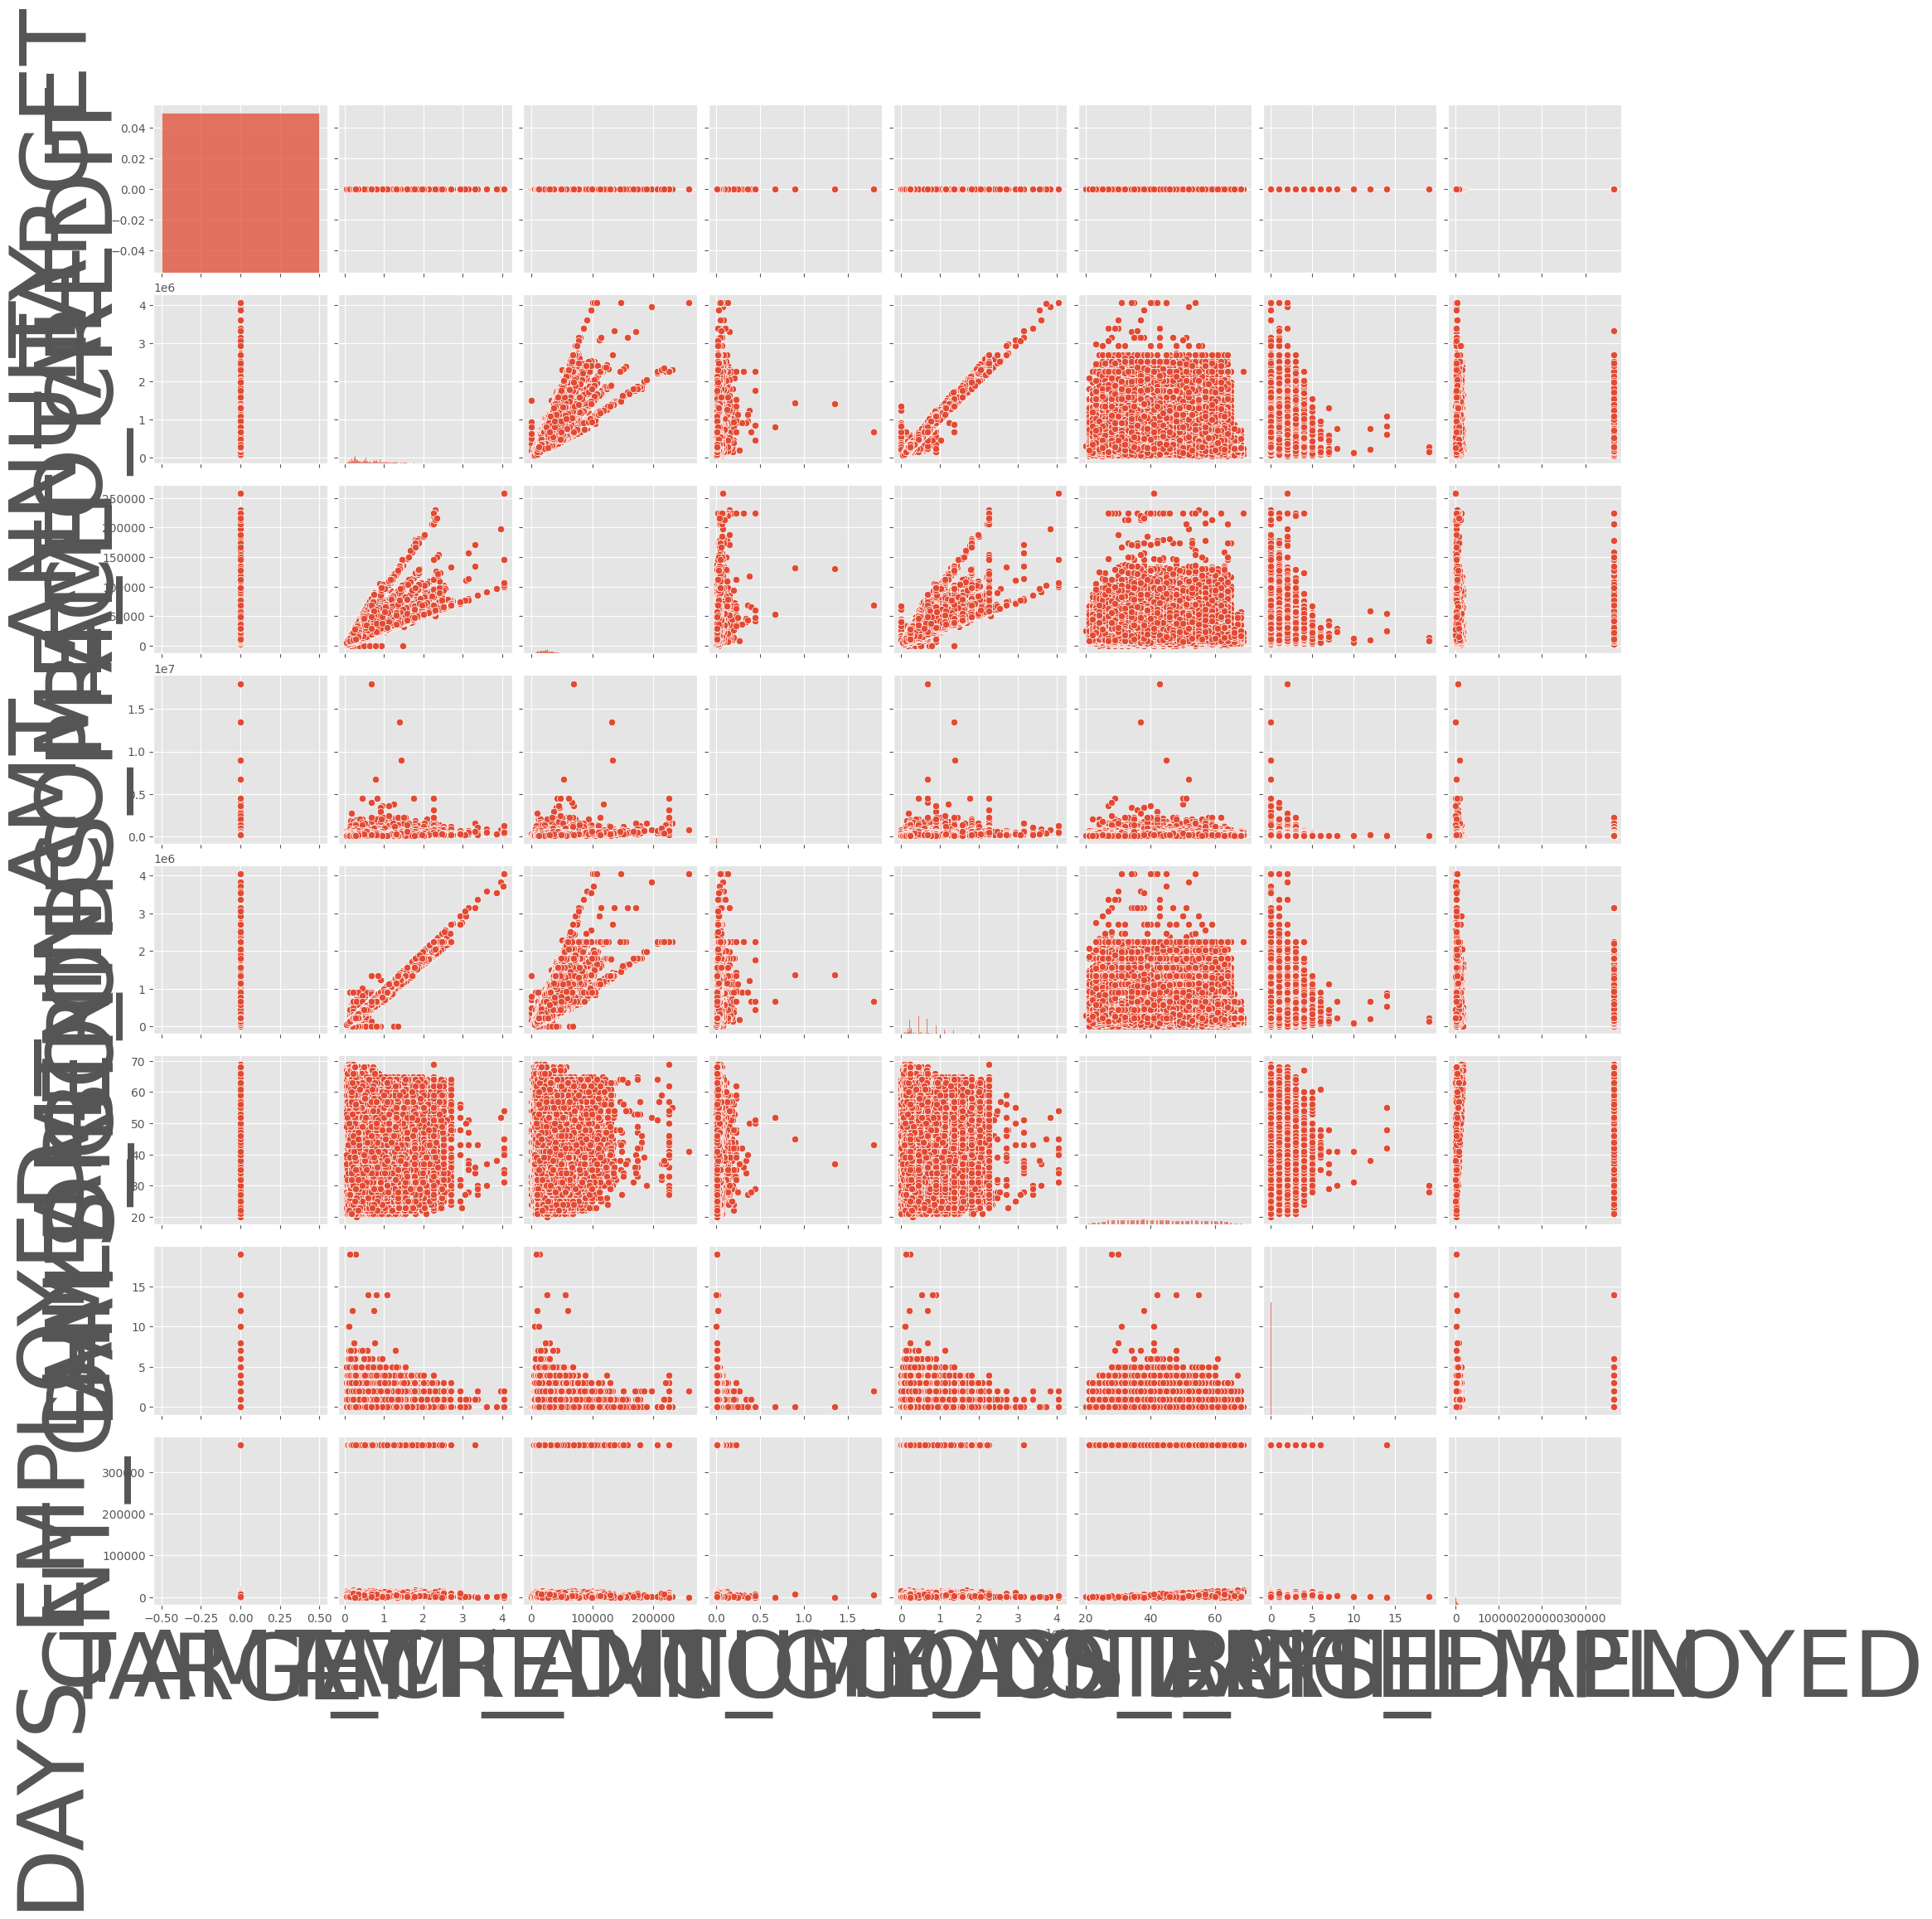

In [53]:
pair = Target0[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH',
                'CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=360, fontsize=10)

plt.show()

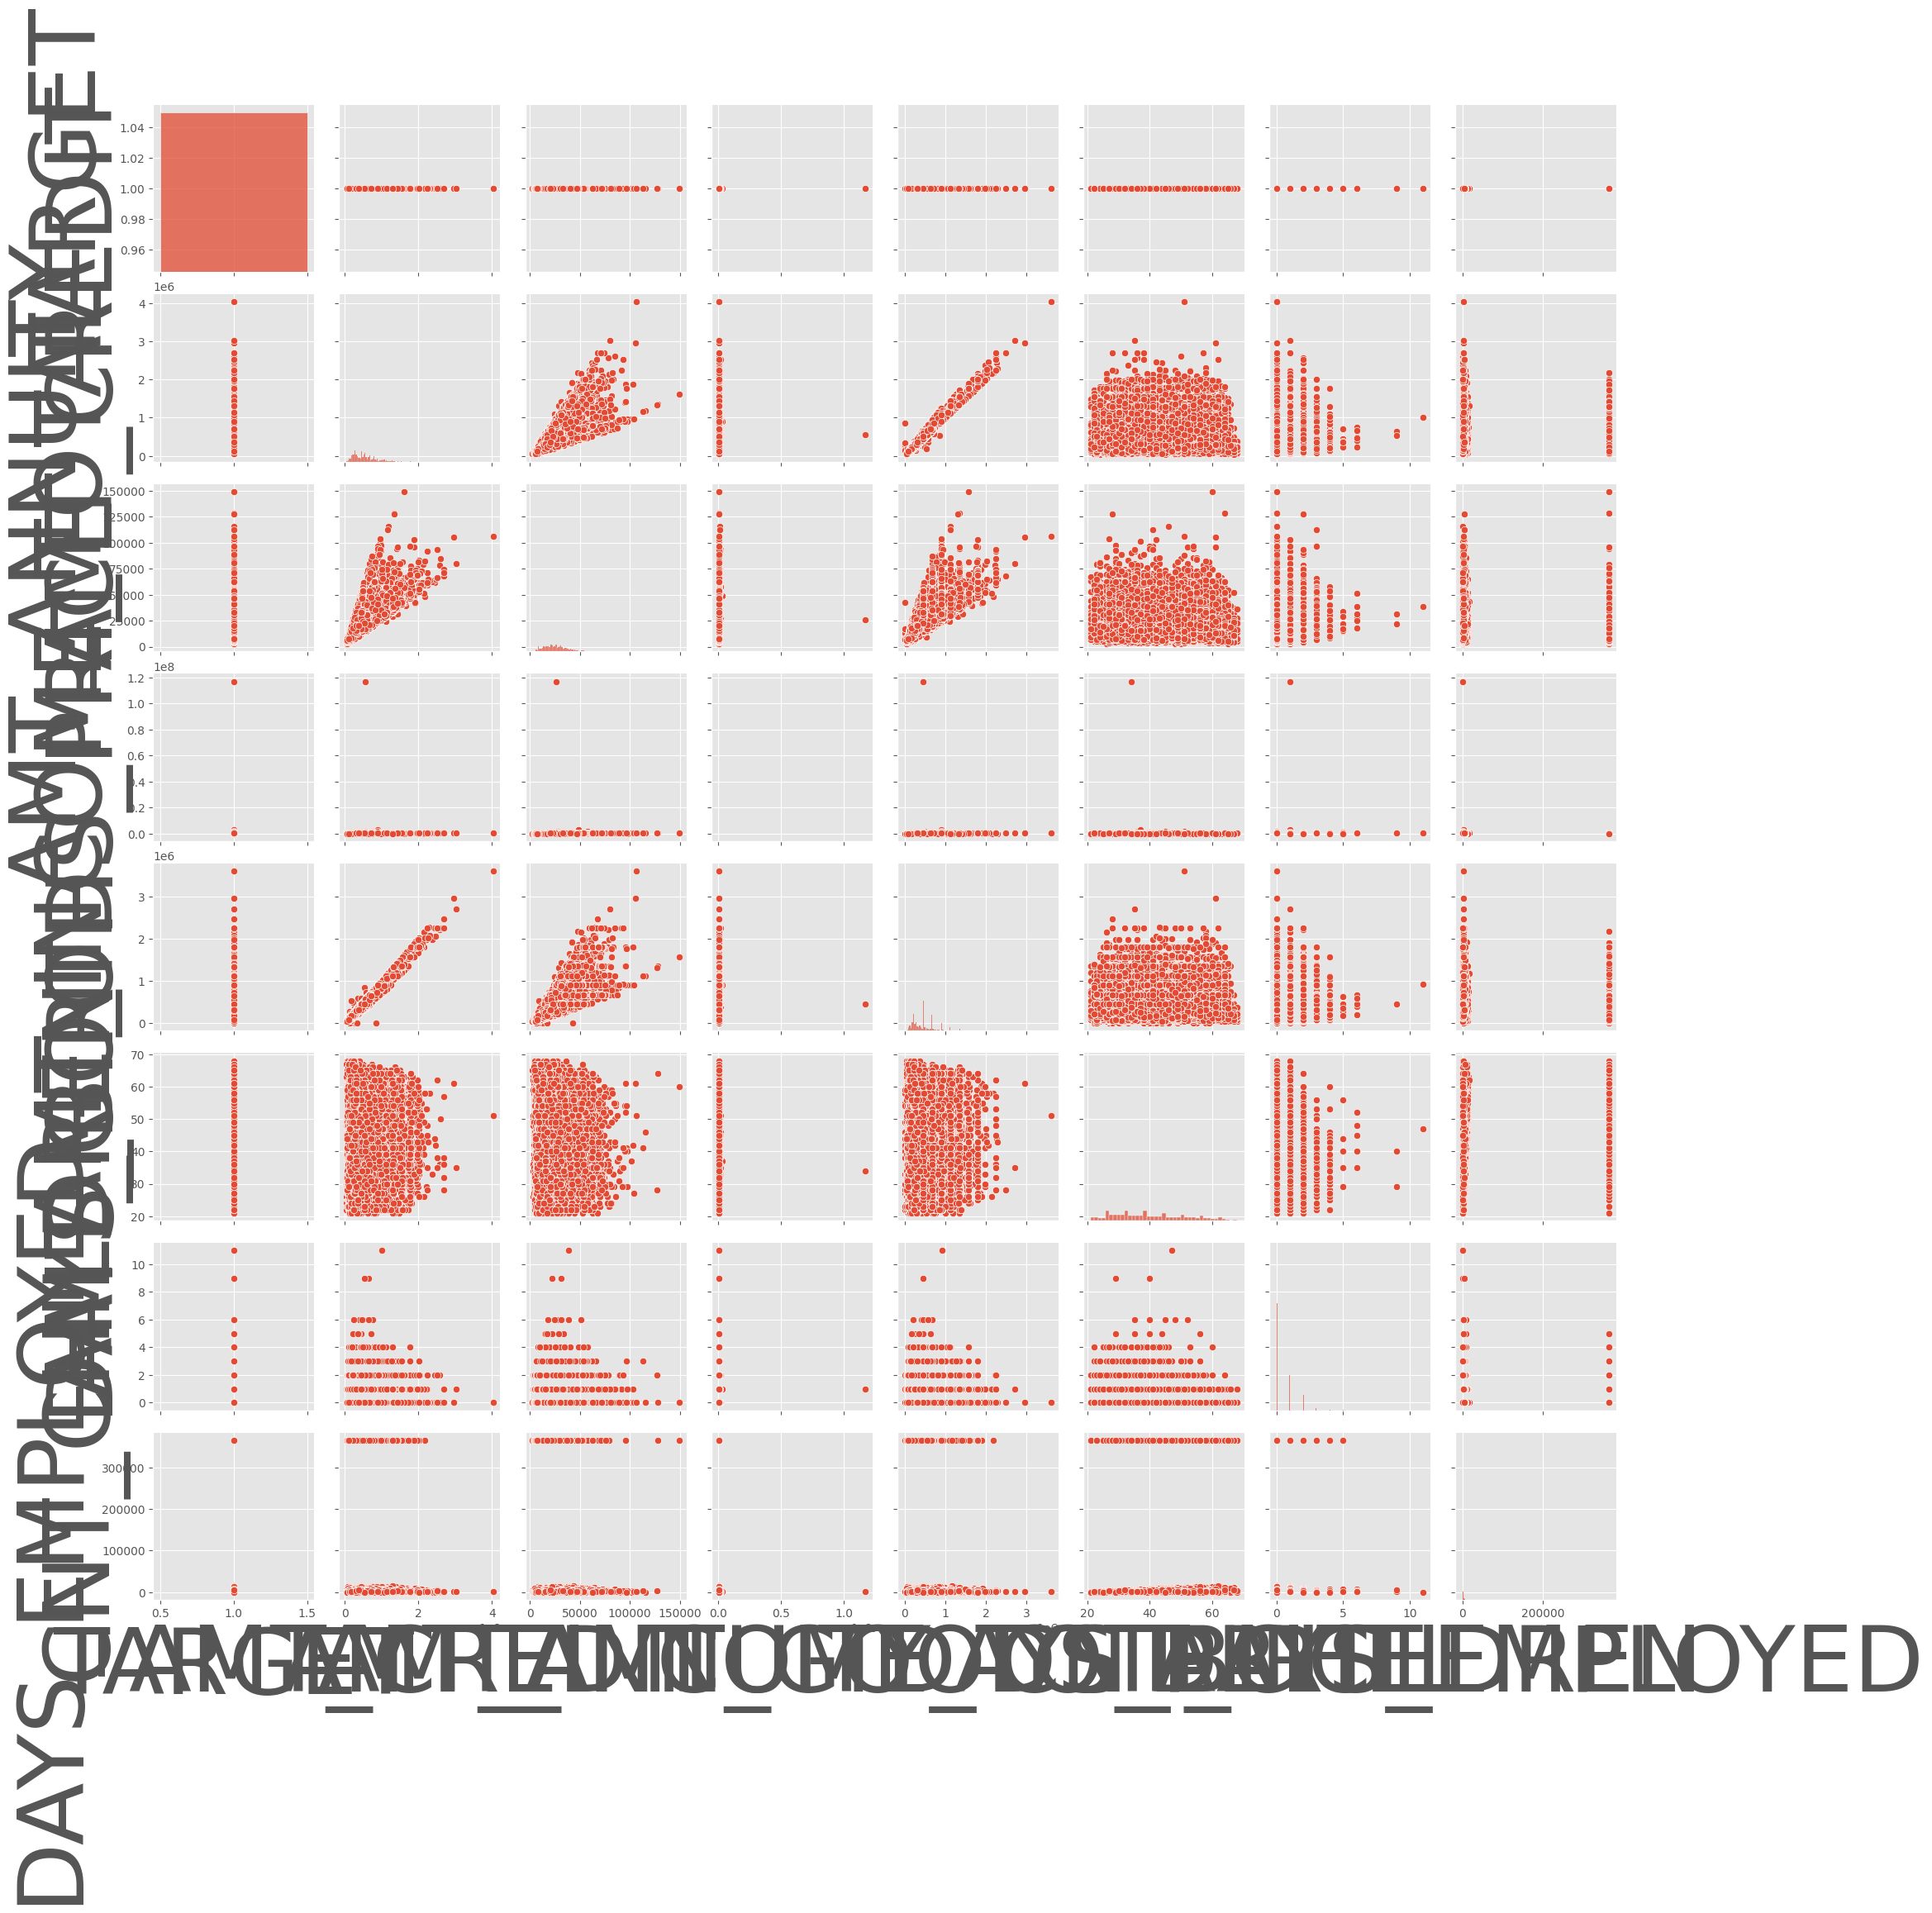

In [54]:
pair = Target1[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=360, fontsize=10)
plt.show()

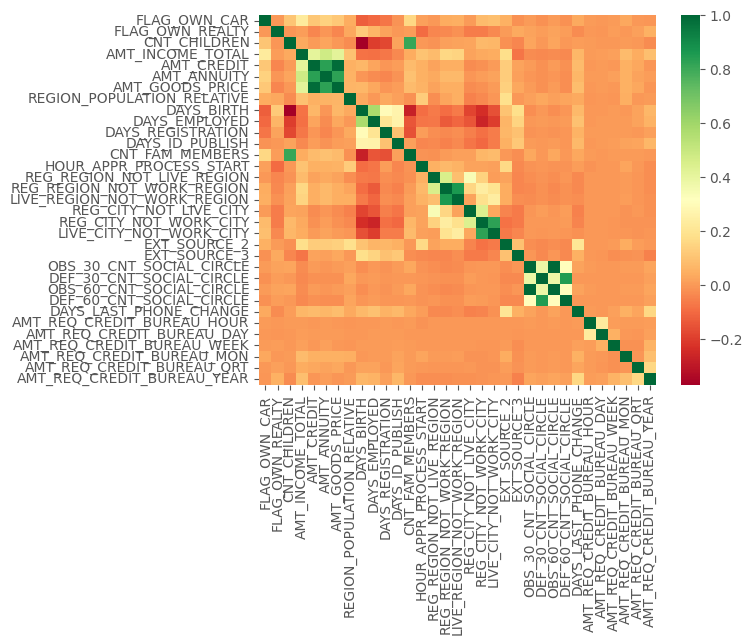

In [55]:
#Correlation between variables under Target0(Defaulters)
corr0=df1.iloc[0:,2:]

t0=corr0.corr(method='spearman')   # t0 - Corelations distibuted according rank wise for target 0

dataplot = sns.heatmap(t0, cmap="RdYlGn",xticklabels=True, yticklabels=True) 

plt.show()

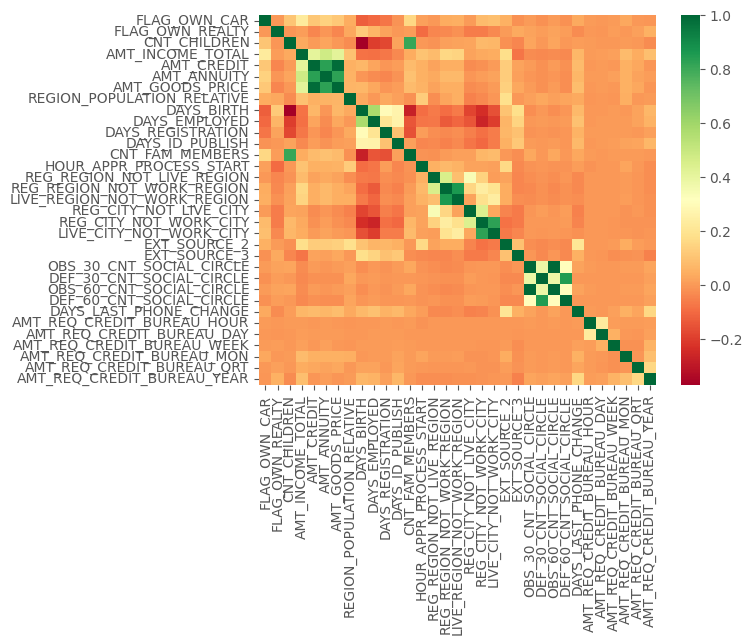

In [56]:
corr1=df1.iloc[0:,2:]

t1=corr1.corr(method='spearman')   # t1 - Corelations distibuted according rank wise for target 1

dataplot1 = sns.heatmap(t1, cmap="RdYlGn",xticklabels=True, yticklabels=True) 

plt.show()

In [ ]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import parallel_coordinates
import numpy as np

#Defaulters dataframe
defaulters = df1

#Changing education values to int
defaulters["NAME_EDUCATION_TYPE"] = np.where(defaulters["NAME_EDUCATION_TYPE"] == "Incomplete higher", 0, defaulters["NAME_EDUCATION_TYPE"])
defaulters["NAME_EDUCATION_TYPE"] = np.where(defaulters["NAME_EDUCATION_TYPE"] == "Higher education", 1, defaulters["NAME_EDUCATION_TYPE"])
defaulters["NAME_EDUCATION_TYPE"] = np.where(defaulters["NAME_EDUCATION_TYPE"] == "Academic degree", 2, defaulters["NAME_EDUCATION_TYPE"])
defaulters["NAME_EDUCATION_TYPE"] = np.where(defaulters["NAME_EDUCATION_TYPE"] == "Secondary / secondary special", 3, defaulters["NAME_EDUCATION_TYPE"])
defaulters["NAME_EDUCATION_TYPE"] = np.where(defaulters["NAME_EDUCATION_TYPE"] == "Lower secondary", 4, defaulters["NAME_EDUCATION_TYPE"])

defaulters["CODE_GENDER"] = np.where(defaulters["CODE_GENDER"] == "F", 0, defaulters["CODE_GENDER"])
defaulters["CODE_GENDER"] = np.where(defaulters["CODE_GENDER"] == "M", 1, defaulters["CODE_GENDER"])

defaulters["FLAG_OWN_CAR"] = np.where(defaulters["FLAG_OWN_CAR"] == "N", 0, defaulters["FLAG_OWN_CAR"])
defaulters["FLAG_OWN_CAR"] = np.where(defaulters["FLAG_OWN_CAR"] == "Y", 1, defaulters["FLAG_OWN_CAR"])

defaulters["FLAG_OWN_REALTY"] = np.where(defaulters["FLAG_OWN_REALTY"] == "N", 0, defaulters["FLAG_OWN_REALTY"])
defaulters["FLAG_OWN_REALTY"] = np.where(defaulters["FLAG_OWN_REALTY"] == "y", 1, defaulters["FLAG_OWN_REALTY"])

selective_defaulters = defaulters.filter(['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','CNT_FAM_MEMBERS','TARGET','NAME_EDUCATION_TYPE'], axis=1)

selective_defaulters

pd.plotting.parallel_coordinates(selective_defaulters,'TARGET',color=('#FF0000', '#00FF00'))

ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
plt.yticks(ticks, ticks)
plt.tick_params(axis='x', which='major', labelsize=7)
plt.show()